# Group information

Names: Giovane Oliveira de Carvalho RA:173146

Francisco Eduardo Pereira Sousa Silva RA: 174292

# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Seoul Bike Sharing Demand**

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather and date information.

In order to have a good quality of service, the company needs to understand how to distribute and maintain the bicycles available (or even buy more bikes).<br/>
This dataset was collected with the objective to understand which wheater and holiday information impact the number of bikes rented in this system.


Features and the corresponding descriptions:
- **Date** : Date of the sample (year-month-day)
- **Rented Bike count (TARGET)**: Count of bikes rented at this specific hour
- **Hour**: Hour of he day
- **Temperature**:Temperature (in Celsius)
- **Humidity**: Air humidity level (in %)
- **Windspeed**: Average windspeed during this hour (in m/s)
- **Visibility**: Average visibility level during this hour (in 10m)
- **Dew point temperature**: Average temperature where steam condeses into water during this hour (in Celsius)
- **Solar radiation**: Average level of radiation emitted by the sun during this hour (in MJ/m²)
- **Rainfall**: Average rainfall during this hour (in mm)
- **Snowfall**: Average snowfall during this hour (in cm)
- **Seasons**: Season of this date, it can be: Winter, Spring, Summer or Autumn
- **Holiday**: Describes if this date is a Holiday or not (Holiday/No holiday)
- **Functional Day**: Wheter this was a functional day or not (0 = Non Functional Hours, 1 = Functional hours)


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
pd.set_option('display.max_columns', None)
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Rented Bike count`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it.

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
## Visualize the data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score, ConfusionMatrixDisplay, f1_score, recall_score, precision_score



print(df.shape)
df.head()

(8760, 14)


,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,256,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
1,01/12/2017,206,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
2,01/12/2017,175,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1
3,01/12/2017,109,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
4,01/12/2017,80,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1


Para começar, vamos separar a base completa em duas: Treino e Teste. Vamos fazer a análise de dados apenas para a base de treino e vamos usar a base de teste apenas para cálculo das métricas finais.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Rented Bike Count'], random_state = 77)
#Vou tirar a coluna de interesse y do x_train e x_test depois. Vou deixar por agora para a analise

In [ ]:
x_train.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6556,31/08/2018,172,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,1
7495,09/10/2018,2,7,10.9,70,0.7,2000,5.6,0.00,0.0,0.0,Autumn,Holiday,0
4718,15/06/2018,4161,14,26.4,43,2.1,1944,12.8,3.23,0.0,0.0,Summer,No Holiday,1
1447,30/01/2018,216,7,-11.3,57,0.9,1984,-18.1,0.00,0.0,0.0,Winter,No Holiday,1
2813,28/03/2018,109,5,10.2,80,0.8,366,6.8,0.00,0.0,0.0,Spring,No Holiday,1


Primeiro vamos explorar as features númericas e sua relação com a variável alvo

In [ ]:
colunas_numericas = x_train.select_dtypes(include= np.number).columns.drop('Rented Bike Count')
colunas_numericas

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day'],
      dtype='object')

Plotando o gráfico de dispersão das variáveis continuas vs a variável alvo

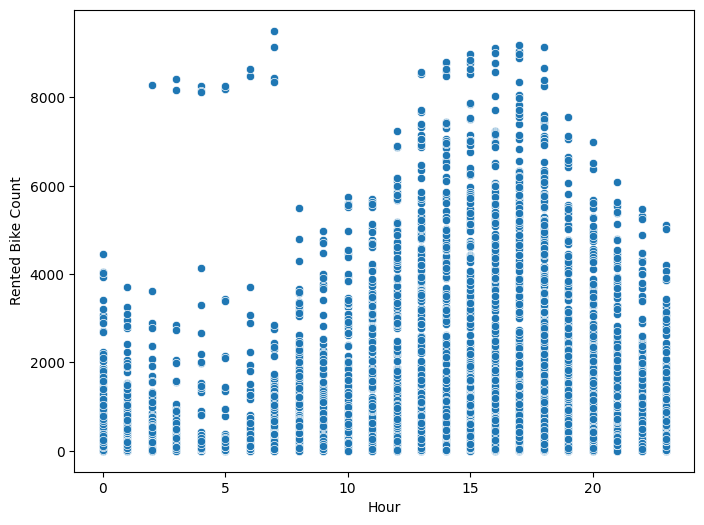

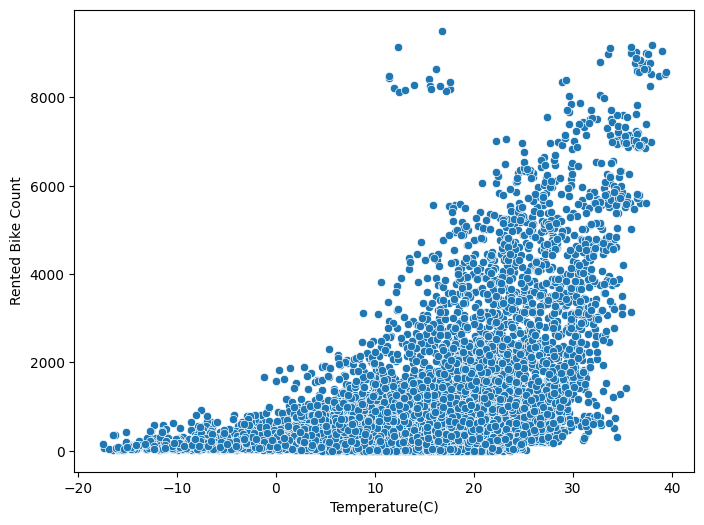

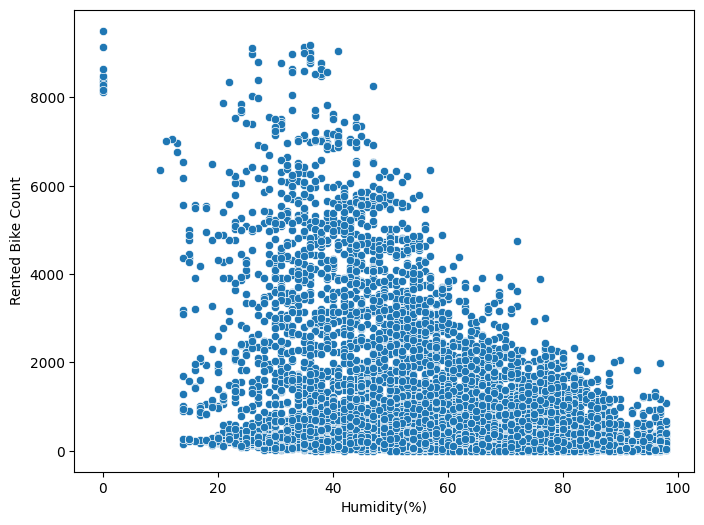

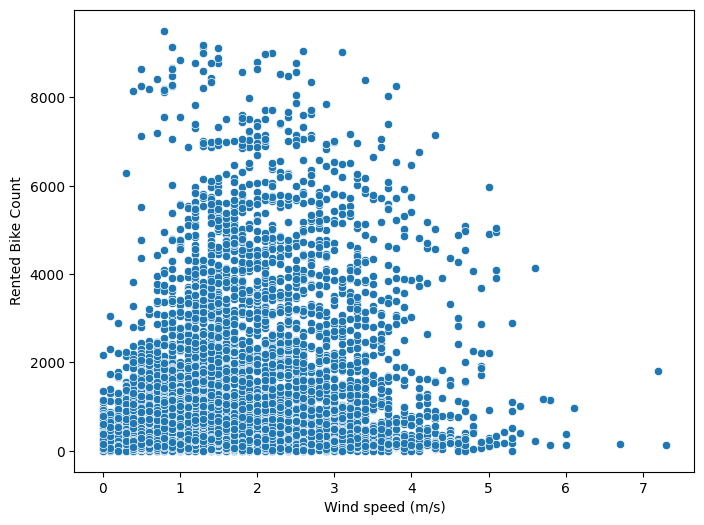

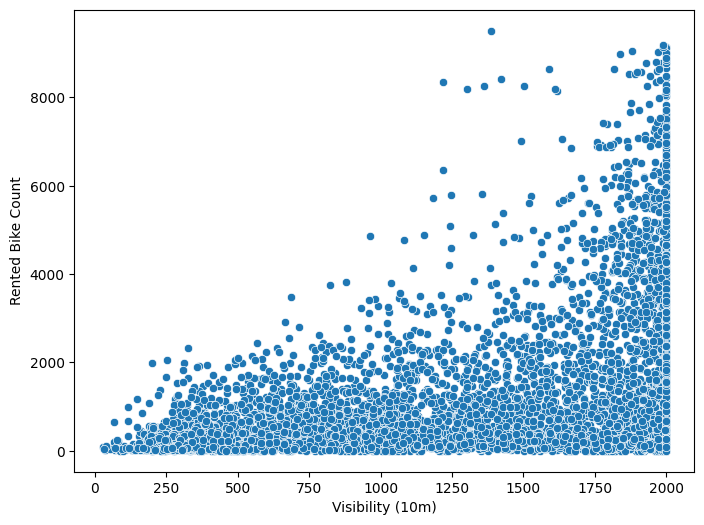

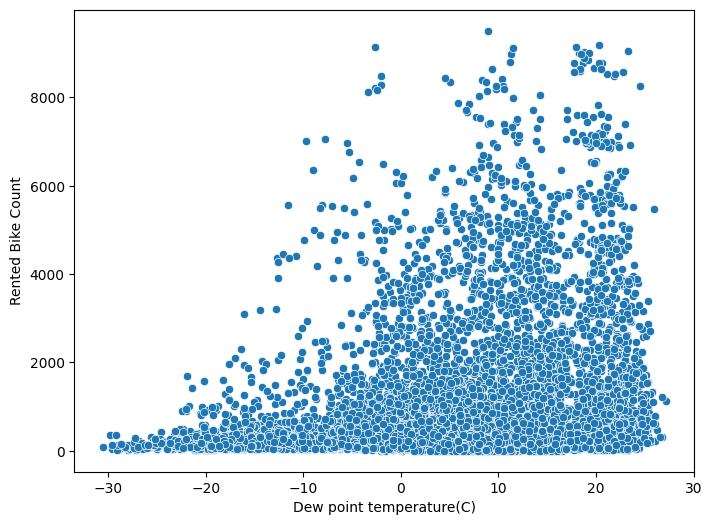

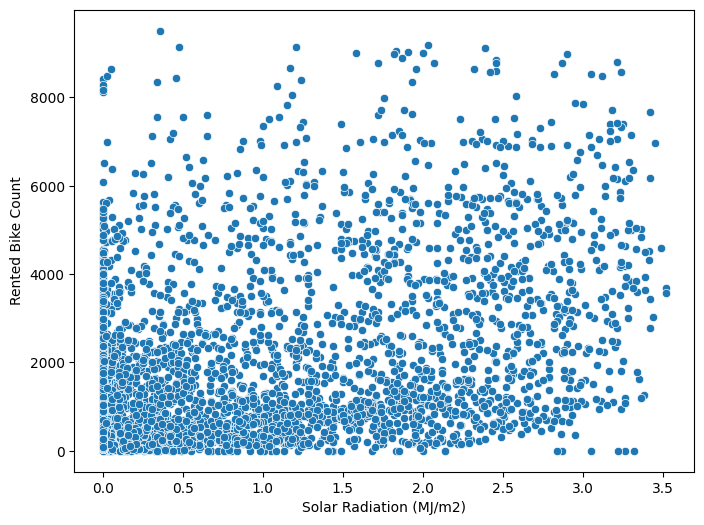

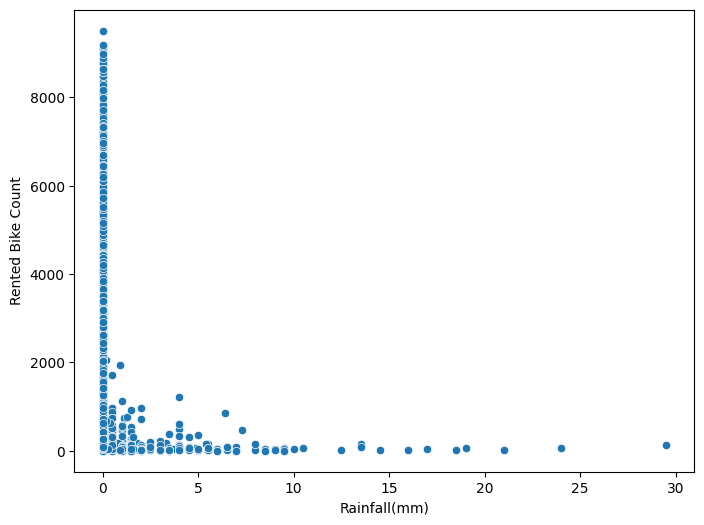

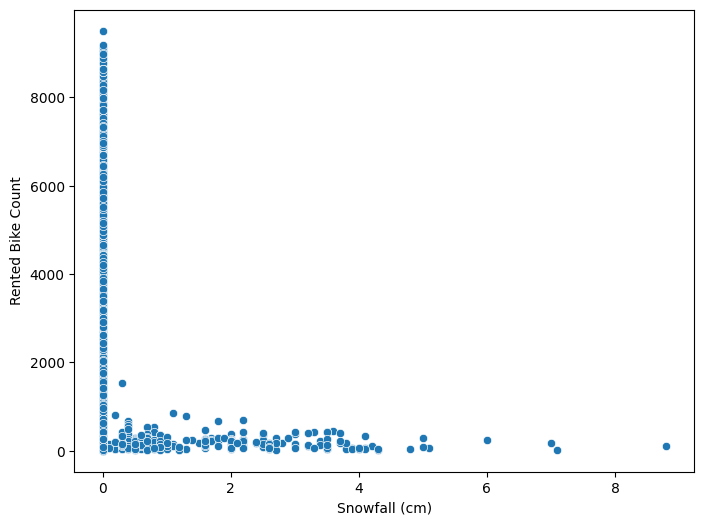

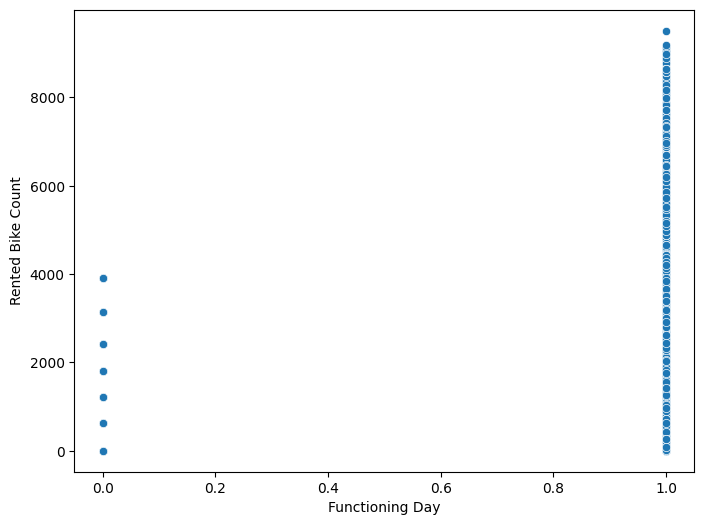

In [ ]:
for i in colunas_numericas:
  plt.figure(figsize = (8,6))
  sns.scatterplot(data = x_train, x = i, y = y_train)
  plt.show()

- Algumas váriaveis parecem ter efeitos/alguma correlação com a variável alvo.

- Temperatura e Umidade se destacam. Dew point também, mas com um valor bem menor.

- Ainda há uma grande concentração de pontos para Condições de não chuva (Rainfall = 0) e de não neve (Snowfall = 0)

- Por fim, ainda percebe-se a relação da variável Funcitioning Day, mas que será melhor visualizada em um gráfico de barra (Na verdade ela é uma feature categórica, por isso vai ficar melhor assim)

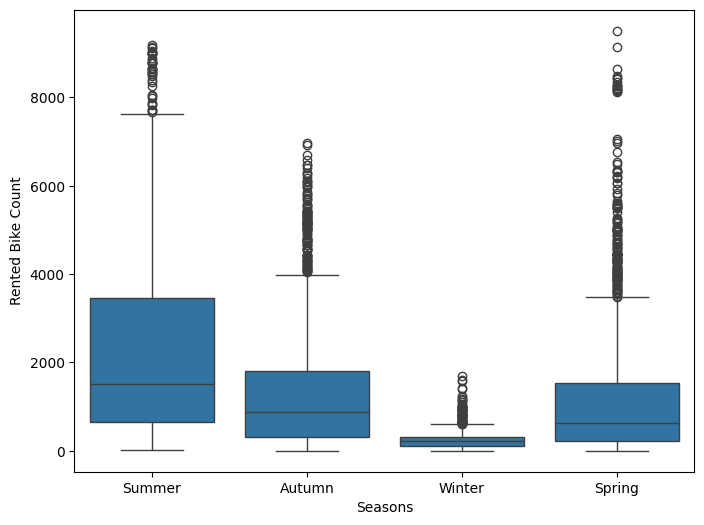

In [ ]:
  plt.figure(figsize = (8,6))
  sns.boxplot(data = x_train, x = 'Seasons', y = y_train)
  plt.show()

- Podemos notar uma grande diferença de distribuição. Destaque para o verão, com uma média mais alta e uma variabilidade maior.

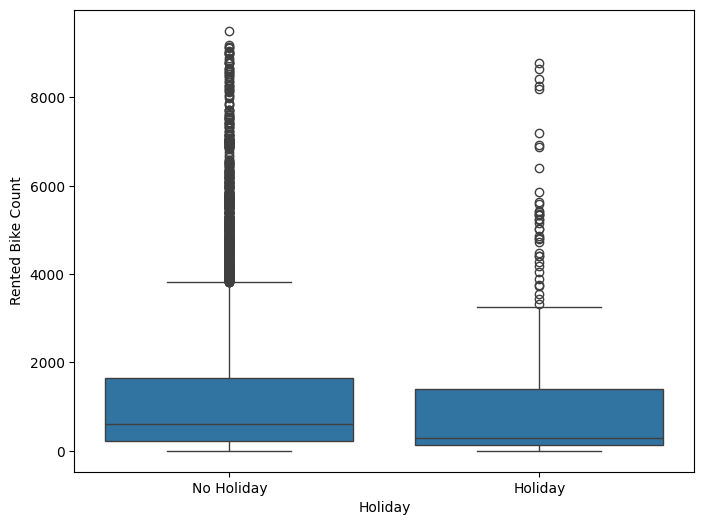

In [ ]:
  plt.figure(figsize = (8,6))
  sns.boxplot(data = x_train, x = 'Holiday', y = y_train)
  plt.show()

- Se é feriado também parece afetar, mas as distribuições ainda são muito parecidas. Um teste de hipótese seria necessário aqui para confirmar a diferença.

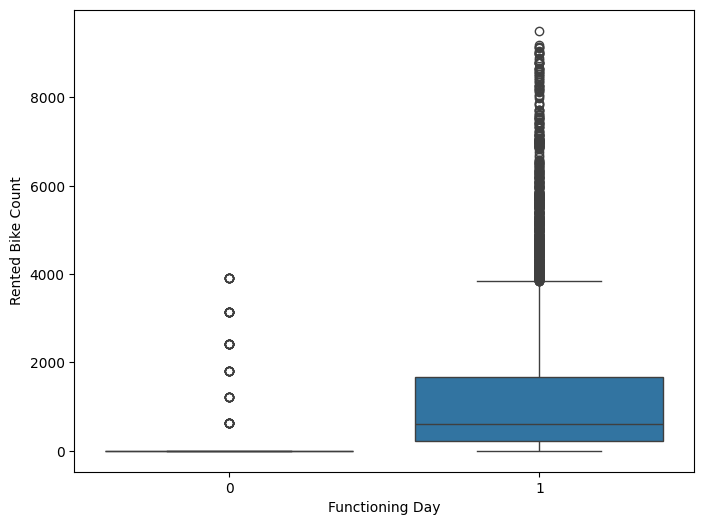

In [ ]:
  plt.figure(figsize = (8,6))
  sns.boxplot(data = x_train, x = 'Functioning Day', y = y_train)
  plt.show()

- A maioria dos dados parecem ocorrer durante dias úteis. Temos muito poucos dados para dinas não úteis.

Por último vamos fazer uma evolução no tempo do aluguel de bicicletas.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,256,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
1,2017-12-01,206,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
2,2017-12-01,175,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1
3,2017-12-01,109,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
4,2017-12-01,80,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1005,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,1
8756,2018-11-30,766,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,1
8757,2018-11-30,696,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,1
8758,2018-11-30,714,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,1


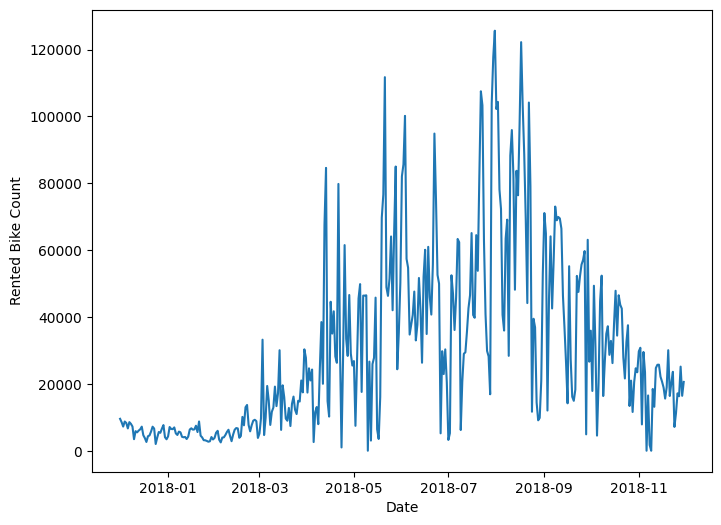

In [ ]:
plt.figure(figsize = (8,6));
sns.lineplot(data = df.groupby('Date').sum(), x = 'Date', y = 'Rented Bike Count');
plt.show();

- Temos poucos dados anteriores a 2018. Percebe-se certa sazionalidade em algumas datas.

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


In [ ]:
#Aplicando o Ordinal Encolder como o exercício está pedindo
enc = OrdinalEncoder()
enc.fit(x_train[['Seasons', 'Holiday']])
df_enc = enc.transform(x_train[['Seasons', 'Holiday']])

In [ ]:
df_enc = df_enc.astype('int32')
x_train[['Seasons', 'Holiday']] = df_enc

In [ ]:
#Dropando colunas não continuas ou categóricas
mt_info = mutual_info_regression(x_train.drop(['Rented Bike Count', 'Date'], axis = 1), x_train['Rented Bike Count'], discrete_features=True)

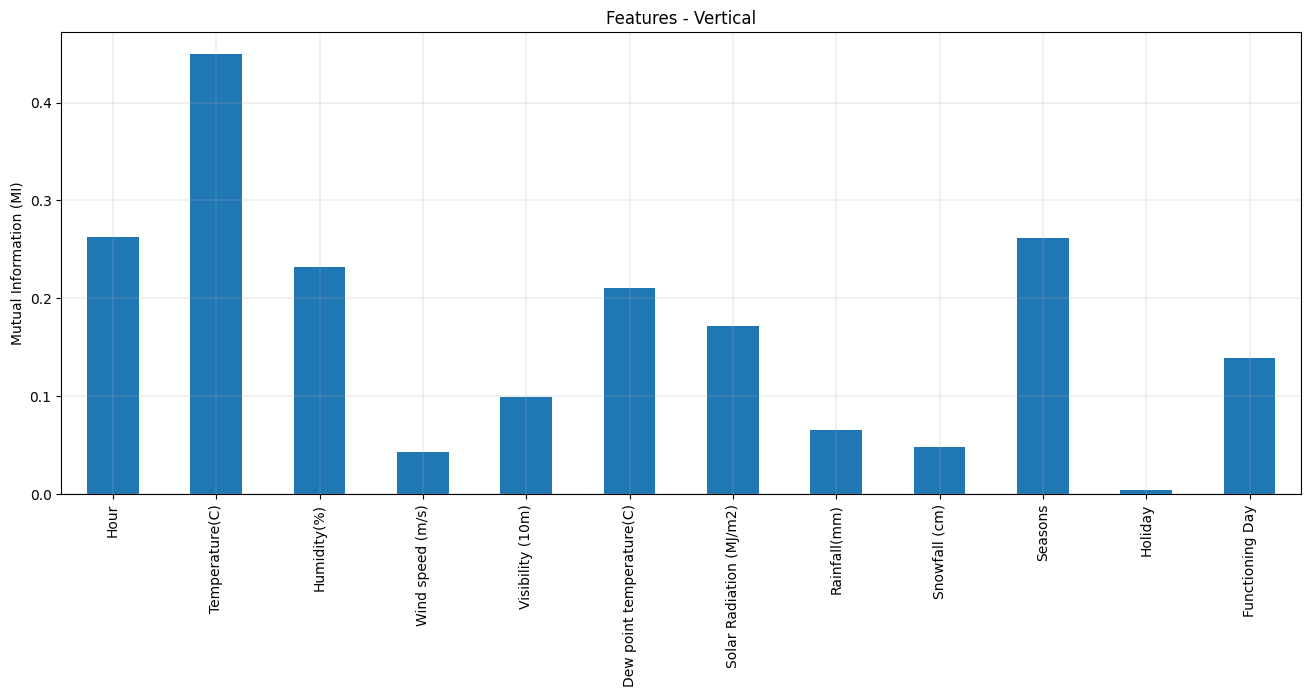

In [ ]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function
mt_info_df = pd.Series(mt_info)
mt_info_df.index = x_train.drop(['Rented Bike Count', 'Date'], axis = 1).columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

#### Discussion of key points

- How the visualization helped in understanding the data?
- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)


As visualizações da EDA ajudaram a corroborar o gráfico de mutual information, As dispersões e gráficos de boxplot pareceram reafirmar algumas análises já vistas acima.

Como visto no gráfico de dispersão e também indicado pelo mutual information, as features Temperatura e umidade tem alta dependência com a variável alvo. Destaca-se também a feature categórica Seasons (Como visto no gráfico de boxplot) e a númerica Dew Point temperature(C).

Algumas features com velocidade do vento e se é feriado ou não tem baixo indicador de mutual information. Elas poderiam ser removidas desse primeiro contexto de modelagem. Até mesmo Rainfall e Snowfall poderiam ser removidas, visto os baixos valores comparado as outras colunas.



### **Implement and train the a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` loss function started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand model perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of those metrics or use it from sklearn. Compare the different metrics.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Rented Bike Count'], random_state = 77)

In [ ]:
x_train.head(2)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6556,2018-08-31,172,4,23.2,83,1.6,1102,20.1,0.0,0.0,0.0,Summer,No Holiday,1
7495,2018-10-09,2,7,10.9,70,0.7,2000,5.6,0.0,0.0,0.0,Autumn,Holiday,0


Primeiramente vamos retirar as colunas que não mostraram um grande potencial de serem utilizadas como bons preditores pelo mutual information

In [ ]:
x_train = x_train.drop(['Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)', 'Date', 'Rented Bike Count'], axis = 1)
x_test = x_test.drop(['Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)', 'Date', 'Rented Bike Count'], axis = 1)
x_test.head()

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Functioning Day
4952,8,23.8,66,960,17.0,0.74,Summer,1
3779,11,20.2,45,1894,7.8,2.33,Spring,1
577,1,-1.2,57,1429,-8.6,0.00,Winter,1
5527,7,23.6,75,856,18.9,0.36,Summer,1
1844,20,-0.4,27,2000,-17.1,0.00,Winter,1


Ainda sim, precisamos fazer algumas transformações! A primeira é normalizar os valores numéricos. Isso vai nos ajudar em uma série de fatores, a principal é a velocidade de treinamento (GD).

In [ ]:


cols_transform = x_train.columns.drop(['Seasons', 'Functioning Day'])

scaler = StandardScaler()
scaler.fit(x_train[cols_transform])

x_train[cols_transform]  = scaler.transform(x_train[cols_transform])
x_test[cols_transform]  = scaler.transform(x_test[cols_transform])

Vamos ver o resultado:

In [ ]:
print(x_train.shape)
x_train.head()

(6570, 8)


,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Functioning Day
6556,-1.092995,0.849934,1.219982,-0.559884,1.221535,-0.649458,Summer,1
7495,-0.662110,-0.182430,0.580397,0.919237,0.103531,-0.649458,Autumn,0
4718,0.343286,1.118516,-0.747973,0.826998,0.658678,3.027495,Summer,1
1447,-0.662110,-2.045721,-0.059188,0.892883,-1.723826,-0.649458,Winter,1
2813,-0.949367,-0.241183,1.072386,-1.772170,0.196056,-0.649458,Spring,1


Agora vamos fazer o One-Hot encoding da variável seasons

In [ ]:
ONE = OneHotEncoder(sparse_output = False)
ONE.fit(x_train[['Seasons']])

# X_train
x_train_dummy = ONE.transform(x_train[['Seasons']])
x_train_dummy = pd.DataFrame(x_train_dummy, columns = list(ONE.categories_), index = x_train.index)
x_train_dummy.columns = [col[0] for col in x_train_dummy.columns]
x_train = pd.concat([x_train.drop('Seasons', axis = 1), x_train_dummy], axis = 1)


# X_test
x_test_dummy = ONE.transform(x_test['Seasons'].to_numpy().reshape(-1, 1))
x_test_dummy = pd.DataFrame(x_test_dummy, columns = ONE.categories_, index = x_test.index)
x_test_dummy.columns = [col[0] for col in x_test_dummy.columns]

x_test = pd.concat([x_test.drop('Seasons', axis = 1), x_test_dummy], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


Agora temos 1 coluna para cada estação do ano.

In [ ]:
display(x_train.head(2))
display(x_test.head(2))

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Functioning Day,Autumn,Spring,Summer,Winter
6556,-1.092995,0.849934,1.219982,-0.559884,1.221535,-0.649458,1,0.0,0.0,1.0,0.0
7495,-0.662110,-0.182430,0.580397,0.919237,0.103531,-0.649458,0,1.0,0.0,0.0,0.0


,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Functioning Day,Autumn,Spring,Summer,Winter
4952,-0.518482,0.900293,0.383601,-0.793776,0.982513,0.192940,1,0.0,0.0,1.0,0.0
3779,-0.087598,0.598138,-0.649575,0.744642,0.273159,2.002957,1,0.0,1.0,0.0,0.0


Pronto, devidas transformações feitas.

Construindo a função para o cálculo do MSE e do GD.

In [ ]:
# TODO: MSE Loss. You cannot use machine learning libraries for this!!
def MSE(y_pred, y):
  Residuals = y_pred - y
  sq_residuals = Residuals * Residuals
  MSE = sum(sq_residuals)/y.shape[0]

  return MSE

In [ ]:
# TODO: Finish the implementation of MyLinearRegressor.
class MyLinearRegressor():
  np.random.seed(42)

  def __init__(self,learning_rate, max_iter, break_point = 0.001):
    self.learning_rate    = learning_rate
    self.max_iter         = max_iter
    self.break_point      = break_point
    self.bias             = np.random.rand() # Inicializando o Bias
    self.valores_mse      = []
    self.valores_weights  = []



  def fit(self, x, y):

    n, p = x.shape
    self.weights          = np.random.rand(p,1).flatten()

    #Inicializando os pesos de forma aleatória

    for i in range(self.max_iter):

      y_pred = (np.dot(x, self.weights) + self.bias)

      mse = MSE(y_pred, y)
      self.valores_mse.append(mse)

      # Derivada parcial em relação aos pesos
      dl_dw = (2/n) * np.dot(x.T, (y_pred - y))
      # print(dl_dw)

      #Derivada parcial em relação ao bias
      dl_db  = (2/n) * sum((y_pred - y))
      # print(dl_db)

      self.weights -=  self.learning_rate * dl_dw
      self.bias    -=  self.learning_rate * dl_db


      y_pred = (np.dot(x, self.weights) + self.bias)

      mse_depois = MSE(y_pred, y)

      if 1 - mse_depois/mse < self.break_point:
        break


  # Função Predict
  def predict(self,X):
    self.y_pred = (np.dot(X, self.weights) + self.bias)
    return self.y_pred


In [ ]:
lr = MyLinearRegressor(learning_rate = 0.001, max_iter = 10000)

lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

Vamos olhar o comportamento da previsão na base de treino!

<Axes: ylabel='Rented Bike Count'>

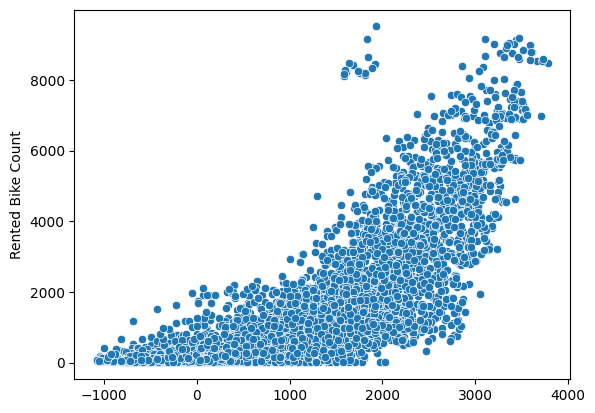

In [ ]:
sns.scatterplot(x = y_pred, y = y_train)

Fazendo a predição da base de teste.

In [ ]:
y_pred_test = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

Calculando as métricas solicitadas

In [ ]:
print(f'O valor de MSE para o conjunto de teste foi de {round(MSE(y_test, y_pred_test),0)}')
print(f'O valor de R2 para o conjunto de teste foi de {round(r2_score(y_test, y_pred_test),2)}')
print(f'O valor de MAE para o conjunto de teste foi de {round(mean_absolute_error(y_test, y_pred_test),0)}')

O valor de MSE para o conjunto de teste foi de 1098897.0
O valor de R2 para o conjunto de teste foi de 0.56
O valor de MAE para o conjunto de teste foi de 693.0


#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?
- Your Linear Regressor was able to closely estimate the amount of bikes rented per hour? Justify using a machine learning metric.
- What do you think is the biggest error type in your model: variance or bias?

In [ ]:
round(y_test.mean(),2)

1192.09

Olhando as métricas propostas podemos pensar em duas maneiras de explicita-las da melhor forma. Pensando em uma visão de negócio/business, a possível melhor proposta seria a do MAE. Ao trazer isso para um público gerencial e tomador de decisão seria mais fácil explicar que "erramos em média" em 693 bikes em nosso estimador. Já pensando em uma visão como cientista de dados, a melhor opção seria a do R2, pois ela consegue mostrar em maneira percentual a quantidade de variância explicada pelo modelo, ficando menos subjetiva ao conhecimento de negócio.

Quanto a previsão, não diria que foi satisfatória. Um R2 de 0.56 parece baixo e o gráfico de y_pred e y_test tem muita dispersão. Além disso o MAE é de 693 enquanto a média de y_test é de 1192. Se fizemos a equivalência dos dois parece um número bem alto de erro proporcional a média.

Por fim, o erro parece estar mais no viés, justamente pela escolha do modelo de regressão linear com os parametros usados. Um outro modelo (Random Forest) poderia ser testado para ver a performace. Novas features (variantes das features originais) também poderiam ser testadas (Polinomios, mutiplicação de features).

### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

Vamos usar os mesmos parametros que usamos no modelo construido;

In [ ]:
# TODO: Traing the SGDRegressor. You should use sklearn libraries.
from sklearn.linear_model import SGDRegressor

rg = SGDRegressor(max_iter = 10000, tol = 0.001, learning_rate = 'constant', eta0 = 0.001)

rg.fit(x_train,y_train)

y_pred = rg.predict(x_train)

<Axes: ylabel='Rented Bike Count'>

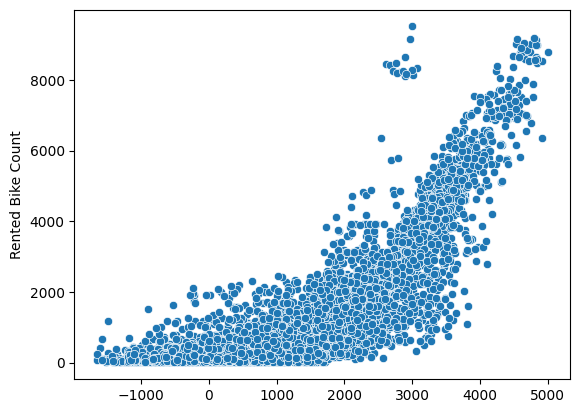

In [ ]:
sns.scatterplot(x = y_pred, y = y_train)

In [ ]:
y_pred_test = rg.predict(x_test)

In [ ]:
print(f'O valor de MSE para o conjunto de teste foi de {round(MSE(y_test, y_pred_test),0)}')
print(f'O valor de R2 para o conjunto de teste foi de {round(r2_score(y_test, y_pred_test),2)}')
print(f'O valor de MAE para o conjunto de teste foi de {round(mean_absolute_error(y_test, y_pred_test),0)}')

O valor de MSE para o conjunto de teste foi de 933118.0
O valor de R2 para o conjunto de teste foi de 0.63
O valor de MAE para o conjunto de teste foi de 746.0


Os resultados foram bem parecidos. O modelo teve um r2 melhor, mas um MAE maior.

### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



In [ ]:
# Reload the dataset

# link with google drive
from google.colab import drive
import pandas as pd
pd.set_option('display.max_columns', None)
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)


Mounted at /content/gdrive


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,256,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
1,01/12/2017,206,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
2,01/12/2017,175,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1
3,01/12/2017,109,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
4,01/12/2017,80,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1


In [ ]:
# Transform features

#Vamos testar a multiplicação de todas as colunas numéricas entre si

for i in colunas_numericas:
  for ii in colunas_numericas:
    if i != ii:
      df[f'{i} vs {ii}'] = df[i] * df[ii]

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Hour vs Temperature(C),Hour vs Humidity(%),Hour vs Wind speed (m/s),Hour vs Visibility (10m),Hour vs Dew point temperature(C),Hour vs Solar Radiation (MJ/m2),Hour vs Rainfall(mm),Hour vs Snowfall (cm),Hour vs Functioning Day,Temperature(C) vs Hour,Temperature(C) vs Humidity(%),Temperature(C) vs Wind speed (m/s),Temperature(C) vs Visibility (10m),Temperature(C) vs Dew point temperature(C),Temperature(C) vs Solar Radiation (MJ/m2),Temperature(C) vs Rainfall(mm),Temperature(C) vs Snowfall (cm),Temperature(C) vs Functioning Day,Humidity(%) vs Hour,Humidity(%) vs Temperature(C),Humidity(%) vs Wind speed (m/s),Humidity(%) vs Visibility (10m),Humidity(%) vs Dew point temperature(C),Humidity(%) vs Solar Radiation (MJ/m2),Humidity(%) vs Rainfall(mm),Humidity(%) vs Snowfall (cm),Humidity(%) vs Functioning Day,Wind speed (m/s) vs Hour,Wind speed (m/s) vs Temperature(C),Wind speed (m/s) vs Humidity(%),Wind speed (m/s) vs Visibility (10m),Wind speed (m/s) vs Dew point temperature(C),Wind speed (m/s) vs Solar Radiation (MJ/m2),Wind speed (m/s) vs Rainfall(mm),Wind speed (m/s) vs Snowfall (cm),Wind speed (m/s) vs Functioning Day,Visibility (10m) vs Hour,Visibility (10m) vs Temperature(C),Visibility (10m) vs Humidity(%),Visibility (10m) vs Wind speed (m/s),Visibility (10m) vs Dew point temperature(C),Visibility (10m) vs Solar Radiation (MJ/m2),Visibility (10m) vs Rainfall(mm),Visibility (10m) vs Snowfall (cm),Visibility (10m) vs Functioning Day,Dew point temperature(C) vs Hour,Dew point temperature(C) vs Temperature(C),Dew point temperature(C) vs Humidity(%),Dew point temperature(C) vs Wind speed (m/s),Dew point temperature(C) vs Visibility (10m),Dew point temperature(C) vs Solar Radiation (MJ/m2),Dew point temperature(C) vs Rainfall(mm),Dew point temperature(C) vs Snowfall (cm),Dew point temperature(C) vs Functioning Day,Solar Radiation (MJ/m2) vs Hour,Solar Radiation (MJ/m2) vs Temperature(C),Solar Radiation (MJ/m2) vs Humidity(%),Solar Radiation (MJ/m2) vs Wind speed (m/s),Solar Radiation (MJ/m2) vs Visibility (10m),Solar Radiation (MJ/m2) vs Dew point temperature(C),Solar Radiation (MJ/m2) vs Rainfall(mm),Solar Radiation (MJ/m2) vs Snowfall (cm),Solar Radiation (MJ/m2) vs Functioning Day,Rainfall(mm) vs Hour,Rainfall(mm) vs Temperature(C),Rainfall(mm) vs Humidity(%),Rainfall(mm) vs Wind speed (m/s),Rainfall(mm) vs Visibility (10m),Rainfall(mm) vs Dew point temperature(C),Rainfall(mm) vs Solar Radiation (MJ/m2),Rainfall(mm) vs Snowfall (cm),Rainfall(mm) vs Functioning Day,Snowfall (cm) vs Hour,Snowfall (cm) vs Temperature(C),Snowfall (cm) vs Humidity(%),Snowfall (cm) vs Wind speed (m/s),Snowfall (cm) vs Visibility (10m),Snowfall (cm) vs Dew point temperature(C),Snowfall (cm) vs Solar Radiation (MJ/m2),Snowfall (cm) vs Rainfall(mm),Snowfall (cm) vs Functioning Day,Functioning Day vs Hour,Functioning Day vs Temperature(C),Functioning Day vs Humidity(%),Functioning Day vs Wind speed (m/s),Functioning Day vs Visibility (10m),Functioning Day vs Dew point temperature(C),Functioning Day vs Solar Radiation (MJ/m2),Functioning Day vs Rainfall(mm),Functioning Day vs Snowfall (cm)
0,01/12/2017,256,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,-0.0,0,0.0,0,-0.0,0.0,0.0,0.0,0,-0.0,-192.4,-11.44,-10400.0,91.52,-0.0,-0.0,-0.0,-5.2,0,-192.4,81.4,74000,-651.2,0.0,0.0,0.0,37,0.0,-11.44,81.4,4400.0,-38.72,0.0,0.0,0.0,2.2,0,-10400.0,74000,4400.0,-35200.0,0.0,0.0,0.0,2000,-0.0,91.52,-651.2,-38.72,-35200.0,-0.0,-0.0,-0.0,-17.6,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,206,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,-5.5,-209.0,-4.40,-11000.0,96.80,-0.0,-0.0,-0.0,-5.5,38,-209.0,30.4,76000

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Rented Bike Count'], random_state = 77)

In [ ]:
# Check mutual information

enc = OrdinalEncoder()
enc.fit(x_train[['Seasons', 'Holiday']])
df_enc = enc.transform(x_train[['Seasons', 'Holiday']])

df_enc = df_enc.astype('int32')
x_train[['Seasons', 'Holiday']] = df_enc

#Dropando colunas não continuas ou categóricas
mt_info = mutual_info_regression(x_train.drop(['Rented Bike Count', 'Date'], axis = 1), x_train['Rented Bike Count'], discrete_features=True)


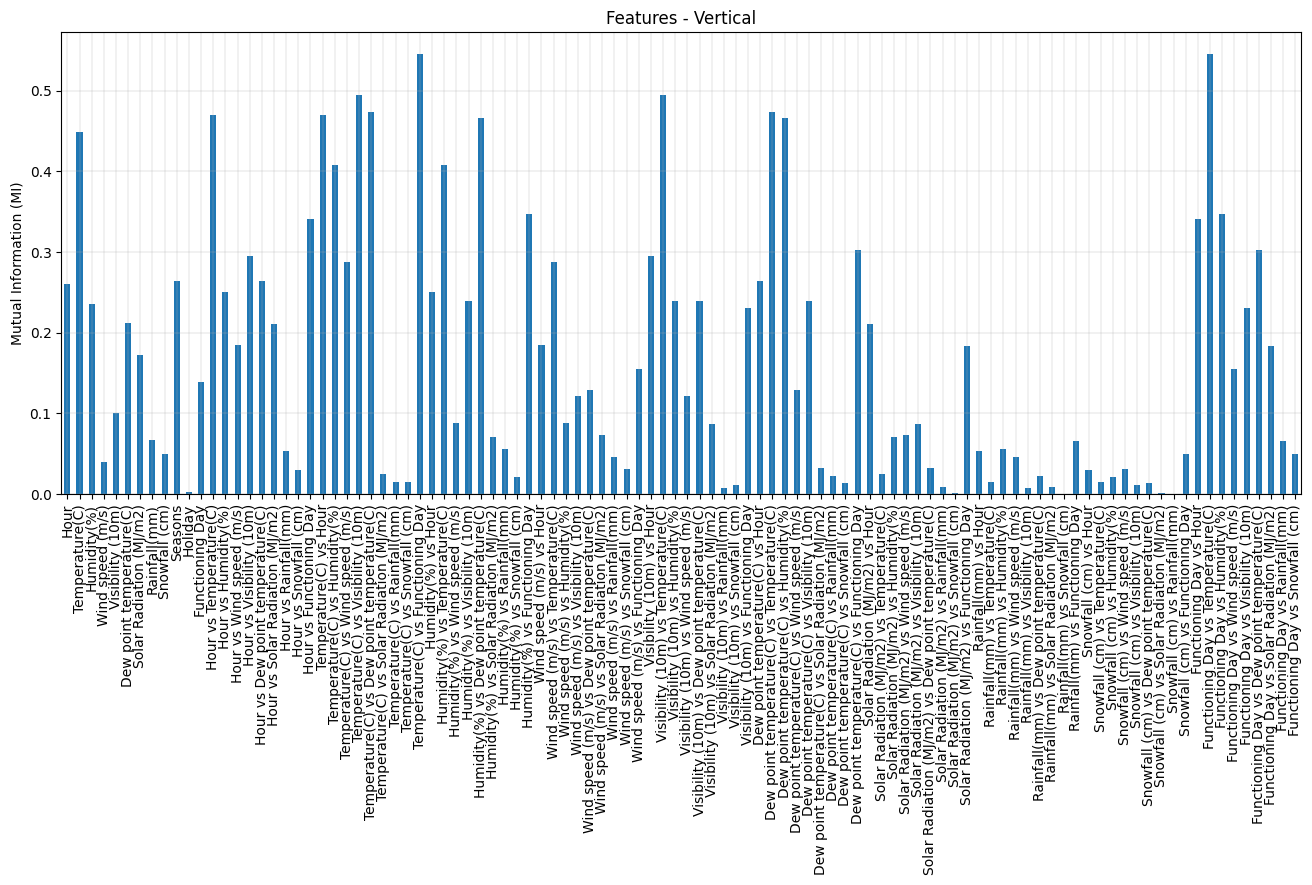

In [ ]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function
mt_info_df = pd.Series(mt_info)
mt_info_df.index = x_train.drop(['Rented Bike Count', 'Date'], axis = 1).columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

Parecemos ter várias colunas representativas agora. Vamos fazer um filtro das features com mais que 0.1 de mutual features.

In [ ]:
cols = mt_info_df[mt_info_df > 0.1].index

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Rented Bike Count'], random_state = 77)

In [ ]:
x_train = x_train[cols]
x_test = x_test[cols]

In [ ]:
x_train.head()

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Functioning Day,Hour vs Temperature(C),Hour vs Humidity(%),Hour vs Wind speed (m/s),Hour vs Visibility (10m),Hour vs Dew point temperature(C),Hour vs Solar Radiation (MJ/m2),Hour vs Functioning Day,Temperature(C) vs Hour,Temperature(C) vs Humidity(%),Temperature(C) vs Wind speed (m/s),Temperature(C) vs Visibility (10m),Temperature(C) vs Dew point temperature(C),Temperature(C) vs Functioning Day,Humidity(%) vs Hour,Humidity(%) vs Temperature(C),Humidity(%) vs Visibility (10m),Humidity(%) vs Dew point temperature(C),Humidity(%) vs Functioning Day,Wind speed (m/s) vs Hour,Wind speed (m/s) vs Temperature(C),Wind speed (m/s) vs Visibility (10m),Wind speed (m/s) vs Dew point temperature(C),Wind speed (m/s) vs Functioning Day,Visibility (10m) vs Hour,Visibility (10m) vs Temperature(C),Visibility (10m) vs Humidity(%),Visibility (10m) vs Wind speed (m/s),Visibility (10m) vs Dew point temperature(C),Visibility (10m) vs Functioning Day,Dew point temperature(C) vs Hour,Dew point temperature(C) vs Temperature(C),Dew point temperature(C) vs Humidity(%),Dew point temperature(C) vs Wind speed (m/s),Dew point temperature(C) vs Visibility (10m),Dew point temperature(C) vs Functioning Day,Solar Radiation (MJ/m2) vs Hour,Solar Radiation (MJ/m2) vs Functioning Day,Functioning Day vs Hour,Functioning Day vs Temperature(C),Functioning Day vs Humidity(%),Functioning Day vs Wind speed (m/s),Functioning Day vs Visibility (10m),Functioning Day vs Dew point temperature(C),Functioning Day vs Solar Radiation (MJ/m2)
6556,4,23.2,83,1102,20.1,0.00,Summer,1,92.8,332,6.4,4408,80.4,0.00,4,92.8,1925.6,37.12,25566.4,466.32,23.2,332,1925.6,91466,1668.3,83,6.4,37.12,1763.2,32.16,1.6,4408,25566.4,91466,1763.2,22150.2,1102,80.4,466.32,1668.3,32.16,22150.2,20.1,0.00,0.00,4,23.2,83,1.6,1102,20.1,0.00
7495,7,10.9,70,2000,5.6,0.00,Autumn,0,76.3,490,4.9,14000,39.2,0.00,0,76.3,763.0,7.63,21800.0,61.04,0.0,490,763.0,140000,392.0,0,4.9,7.63,1400.0,3.92,0.0,14000,21800.0,140000,1400.0,11200.0,0,39.2,61.04,392.0,3.92,11200.0,0.0,0.00,0.00,0,0.0,0,0.0,0,0.0,0.00
4718,14,26.4,43,1944,12.8,3.23,Summer,1,369.6,602,29.4,27216,179.2,45.22,14,369.6,1135.2,55.44,51321.6,337.92,26.4,602,1135.2,83592,550.4,43,29.4,55.44,4082.4,26.88,2.1,27216,51321.6,83592,4082.4,24883.2,1944,179.2,337.92,550.4,26.88,24883.2,12.8,45.22,3.23,14,26.4,43,2.1,1944,12.8,3.23
1447,7,-11.3,57,1984,-18.1,0.00,Winter,1,-79.1,399,6.3,13888,-126.7,0.00,7,-79.1,-644.1,-10.17,-22419.2,204.53,-11.3,399,-644.1,113088,-1031.7,57,6.3,-10.17,1785.6,-16.29,0.9,13888,-22419.2,113088,1785.6,-35910.4,1984,-126.7,204.53,-1031.7,-16.29,-35910.4,-18.1,0.00,0.00,7,-11.3,57,0.9,1984,-18.1,0.00
2813,5,10.2,80,366,6.8,0.00,Spring,1,51.0,400,4.0,1830,34.0,0.00,5,51.0,816.0,8.16,3733.2,69.36,10.2,400,816.0,29280,544.0,80,4.0,8.16,292.8,5.44,0.8,1830,3733.2,29280,292.8,2488.8,366,34.0,69.36,544.0,5.44,2488.8,6.8,0.00,0.00,5,10.2,80,0.8,366,6.8,0.00


In [ ]:
# Normalizandfo os valores núméricos e One Hot Enconding de categoricos

cols_transform = x_train.columns.drop(['Seasons', 'Functioning Day'])

scaler = StandardScaler()
scaler.fit(x_train[cols_transform])

x_train[cols_transform]  = scaler.transform(x_train[cols_transform])
x_test[cols_transform]  = scaler.transform(x_test[cols_transform])

Tratando as colunas categoricas

In [ ]:
ONE = OneHotEncoder(sparse_output = False)
ONE.fit(x_train[['Seasons']])

# X_train
x_train_dummy = ONE.transform(x_train[['Seasons']])
x_train_dummy = pd.DataFrame(x_train_dummy, columns = list(ONE.categories_), index = x_train.index)
x_train_dummy.columns = [col[0] for col in x_train_dummy.columns]
x_train = pd.concat([x_train.drop('Seasons', axis = 1), x_train_dummy], axis = 1)


# X_test
x_test_dummy = ONE.transform(x_test['Seasons'].to_numpy().reshape(-1, 1))
x_test_dummy = pd.DataFrame(x_test_dummy, columns = ONE.categories_, index = x_test.index)
x_test_dummy.columns = [col[0] for col in x_test_dummy.columns]

x_test = pd.concat([x_test.drop('Seasons', axis = 1), x_test_dummy], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
x_train.head()

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Functioning Day,Hour vs Temperature(C),Hour vs Humidity(%),Hour vs Wind speed (m/s),Hour vs Visibility (10m),Hour vs Dew point temperature(C),Hour vs Solar Radiation (MJ/m2),Hour vs Functioning Day,Temperature(C) vs Hour,Temperature(C) vs Humidity(%),Temperature(C) vs Wind speed (m/s),Temperature(C) vs Visibility (10m),Temperature(C) vs Dew point temperature(C),Temperature(C) vs Functioning Day,Humidity(%) vs Hour,Humidity(%) vs Temperature(C),Humidity(%) vs Visibility (10m),Humidity(%) vs Dew point temperature(C),Humidity(%) vs Functioning Day,Wind speed (m/s) vs Hour,Wind speed (m/s) vs Temperature(C),Wind speed (m/s) vs Visibility (10m),Wind speed (m/s) vs Dew point temperature(C),Wind speed (m/s) vs Functioning Day,Visibility (10m) vs Hour,Visibility (10m) vs Temperature(C),Visibility (10m) vs Humidity(%),Visibility (10m) vs Wind speed (m/s),Visibility (10m) vs Dew point temperature(C),Visibility (10m) vs Functioning Day,Dew point temperature(C) vs Hour,Dew point temperature(C) vs Temperature(C),Dew point temperature(C) vs Humidity(%),Dew point temperature(C) vs Wind speed (m/s),Dew point temperature(C) vs Visibility (10m),Dew point temperature(C) vs Functioning Day,Solar Radiation (MJ/m2) vs Hour,Solar Radiation (MJ/m2) vs Functioning Day,Functioning Day vs Hour,Functioning Day vs Temperature(C),Functioning Day vs Humidity(%),Functioning Day vs Wind speed (m/s),Functioning Day vs Visibility (10m),Functioning Day vs Dew point temperature(C),Functioning Day vs Solar Radiation (MJ/m2),Autumn,Spring,Summer,Winter
6556,-1.092995,0.849934,1.219982,-0.559884,1.221535,-0.649458,1,-0.367797,-0.669346,-0.780142,-0.957366,0.170705,-0.640303,-1.011492,-0.367797,1.512771,0.540408,0.294662,1.171642,0.880669,-0.669346,1.512771,0.378865,1.649297,1.184405,-0.780142,0.540408,-0.397440,0.978337,-0.055687,-0.957366,0.294662,0.378865,-0.397440,0.792445,-0.444062,0.170705,1.171642,1.649297,0.978337,0.792445,1.243141,-0.640303,-0.634394,-1.011492,0.880669,1.184405,-0.055687,-0.444062,1.243141,-0.634394,0.0,0.0,1.0,0.0
7495,-0.662110,-0.182430,0.580397,0.919237,0.103531,-0.649458,0,-0.454998,-0.327901,-0.855511,-0.238782,-0.061058,-0.640303,-1.571090,-0.454998,-0.044999,-0.515807,0.121323,-0.589093,-1.037036,-0.327901,-0.044999,1.674089,0.006818,-2.482966,-0.855511,-0.515807,-0.573238,-0.037203,-1.567531,-0.238782,0.121323,1.674089,-0.573238,0.291909,-2.137422,-0.061058,-0.589093,0.006818,-0.037203,0.291909,-0.308968,-0.640303,-0.634394,-1.571090,-1.037036,-2.482966,-1.567531,-2.137422,-0.308968,-0.634394,1.0,0.0,0.0,0.0
4718,0.343286,1.118516,-0.747973,0.826998,0.658678,3.027495,1,1.095061,-0.085864,0.375512,0.751295,0.726487,3.238624,0.387502,1.095061,0.453712,1.196559,1.479983,0.613809,1.145180,-0.085864,0.453712,0.168732,0.210664,-0.583002,0.375512,1.196559,0.725114,0.788463,0.416764,0.751295,1.479983,0.168732,0.725114,0.917371,0.849775,0.726487,0.613809,0.210664,0.788463,0.917371,0.679440,3.238624,3.077923,0.387502,1.145180,-0.583002,0.416764,0.849775,0.679440,3.077923,0.0,0.0,1.0,0.0
1447,-0.662110,-2.045721,-0.059188,0.892883,-1.723826,-0.649458,1,-1.276270,-0.524556,-0.785167,-0.247172,-0.994299,-0.640303,-0.591794,-1.276270,-1.930376,-1.153333,-1.913759,0.034298,-1.971090,-0.524556,-1.930376,0.955890,-1.825351,0.035590,-0.785167,-1.153333,-0.386598,-0.763977,-0.717119,-0.247172,-1.913759,0.955890,-0.386598,-1.861519,0.911240,-0.994299,0.034298,-1.825351,-0.763977,-1.861519,-1.706638,-0.640303,-0.634394,-0.591794,-1.971090,0.035590,-0.717119,0.911240,-1.706638,-0.634394,0.0,0.0,0.0,1.0
2813,-0.949367,-0.241183,1.072386,-1.772170,0.196056,-0.649458,1,-0.588706,-0.522395,-0.900732,-1.150497,-0.090310,-0.640303,-0.871593,-0.588706,0.026016,-0.496824,-0.710158,-0.552947,-0.193907,-0.522395,0.026016,-1.280688,0.202428,1.051850,-0.900732,-0.496824,-1.109152,0.017457,-0.811609,-1.150497,-0.710158,-1.280688,-1.109152,-0.106282,-1.575018,-0.090310,-

In [ ]:
# Re-train and test the model

lr = MyLinearRegressor(learning_rate = 0.001, max_iter = 10000)

lr.fit(x_train, y_train)

y_pred_test = lr.predict(x_test)

<Axes: ylabel='Rented Bike Count'>

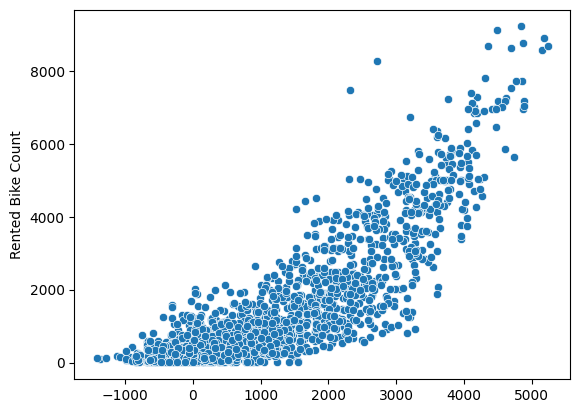

In [ ]:
sns.scatterplot(x = y_pred_test, y = y_test)

In [ ]:
print(f'O valor de MSE para o conjunto de teste foi de {round(MSE(y_test, y_pred_test),0)}')
print(f'O valor de R2 para o conjunto de teste foi de {round(r2_score(y_test, y_pred_test),2)}')
print(f'O valor de MAE para o conjunto de teste foi de {round(mean_absolute_error(y_test, y_pred_test),0)}')

O valor de MSE para o conjunto de teste foi de 734440.0
O valor de R2 para o conjunto de teste foi de 0.71
O valor de MAE para o conjunto de teste foi de 626.0


O valor do R2 subiu de 0.63 do modelo de regressão linear do sklearn para 0.71. Um aumento consideravel, isso muito provavelmente se deve a criação de novas features que conseguem contornar o comportamento não linear do primeiro modelo. A criação de features pela combinação de outras pode encontrar sinergias aditivas ou subtrativas que ajudam no melhor ajuste do modelo.

## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: In-vehicle coupon recommendation**

This dataset was built using Amazon Mechanical Turk, which is a tool to apply surveys to a specific range of users.

The applied survey was made by asking user for demographic informations, and then presenting 20 driving scenarios and possible coupon offers.
<br/>
The users had to answer if they would want the coupon or not.

The focus of this dataset was to understand how to correct apply advertsiment of in-vehicle coupons.

Features and the corresponding descriptions:
- **destination**: Destination of the driving scenario. Options: No Urgent Place, Home, Work
- **passanger**: People in the car of the driving scenario. Options: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Weather of the driving scenario. Options: Sunny, Rainy, Snowy
- **temperature**: Temperature of the driving scenario. Options: 55, 80, 30
- **time**: Hour of the driving scenario. Options: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Type of coupon offered. Options:
  - Restaurant(< \\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration**: Expiration of the coupon in the scenario. Options: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Gender of the person answering the survey. Options: Female, Male
- **age**: Age of the person answering the survey. Options: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Marital status of the person answering the survey. Options: Unmarried partner, Single, Married partner, Divorced, Widowed
- **has_Children**: If the person answering the survey has children. Options:1, 0
- **education**: Edducation level of the person answering the survey. Options: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- **ocupation**: Ocupation of the person answering the survey. Options:
  - Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- **income**: Anual income of the person answering the survey. Options:
  - \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Bar**: Question: how many times do you go to a bar every month? Options: never, less1, 1\~3, 4\~8, gt8, nan
- **CoffeeHouse**: Question: how many times do you go to a coffeehouse every month? never, less1, 4\~8, 1\~3, gt8,  nan
- **CarryAway**: Question: how many times do you get take-away food every month? Options: n4\~8, 1\~3, gt8, less1, never
- **RestaurantLessThan20**: Question: how many times do you go to a restaurant with an average expense per person of less than $20 every month? Options: 4\~8, 1\~3, less1, gt8,  never
- **Restaurant20To50**: Question: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month? Options: 1\~3, less1, never, gt8, 4\~8,  nan
- **toCoupon_GEQ15min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 15 minutes in the driving scenario. Options: 0,1
- **toCoupon_GEQ25min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 25 minutes in the driving scenario. Options: 0,1
- **direction_same**:  Indicator whether the restaurant/bar is in the same direction as your current destination in the driving scenario. Options: 0,1
- **direction_opp**: Indicator whether the restaurant/bar is in the opposite direction as your current destination. Options: 1, 0
- **Y**: Wheter the coupon was accepted. Options: 1, 0

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [ ]:
# link with google drive, remove comments if need to restart from this step.
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "in-vehicle-coupon-recommendation.csv" # Change this to be the correct path if you added the dataset in a different location

df = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


In [ ]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


Temos muitas colunas no dataset dessa vez. A maioria delas são variáveis categóricas e o problema dessa vez é um problema de classificação. Dessa maneira vamos usar de gráficos de contagem para explorar os dados.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Y'], random_state = 77)

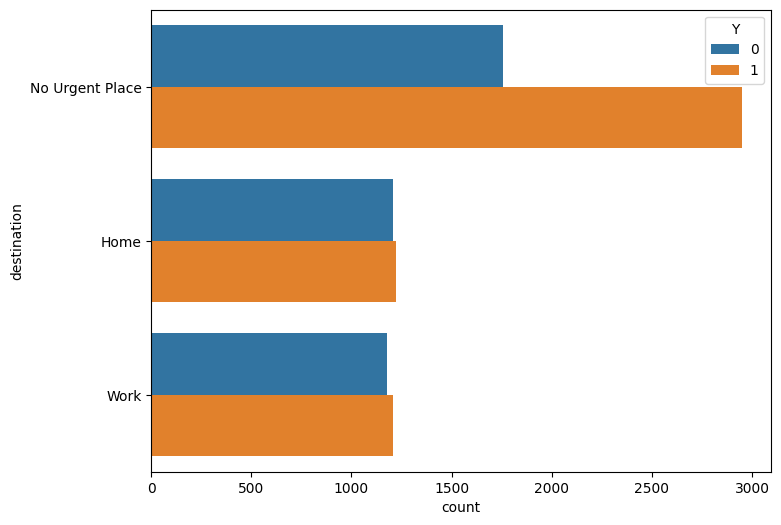

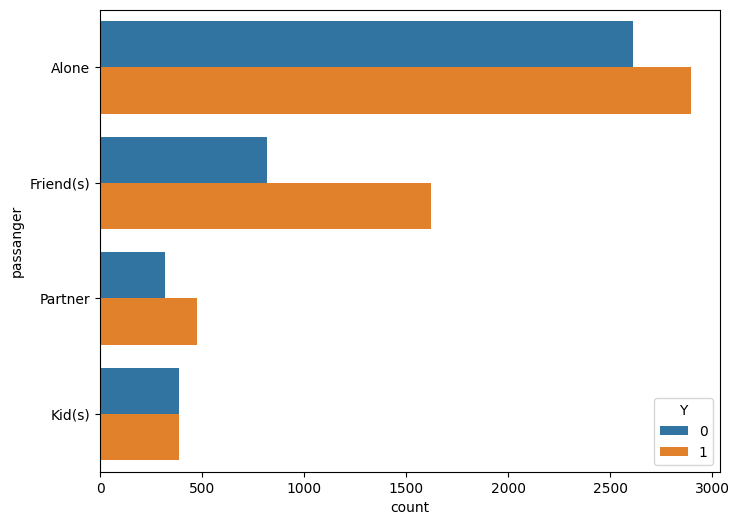

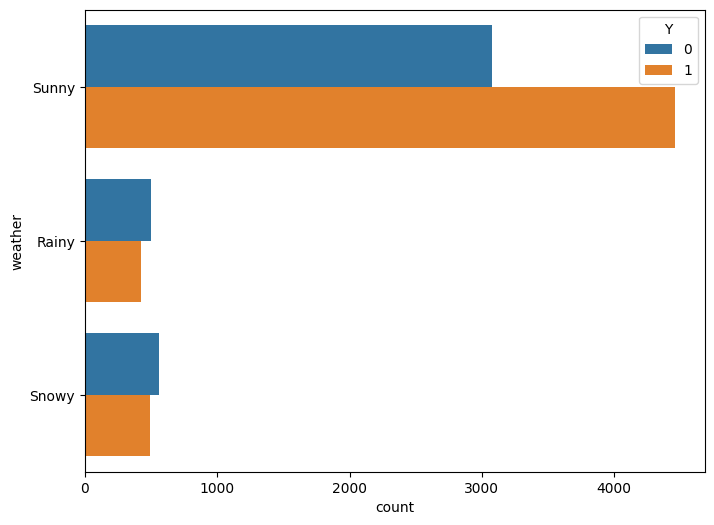

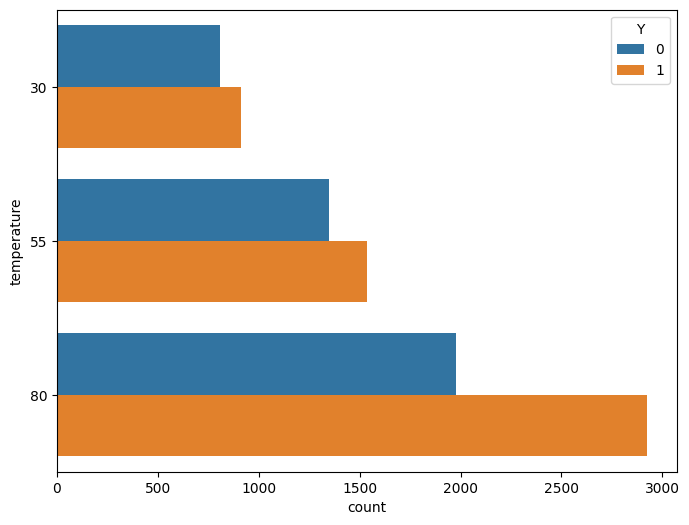

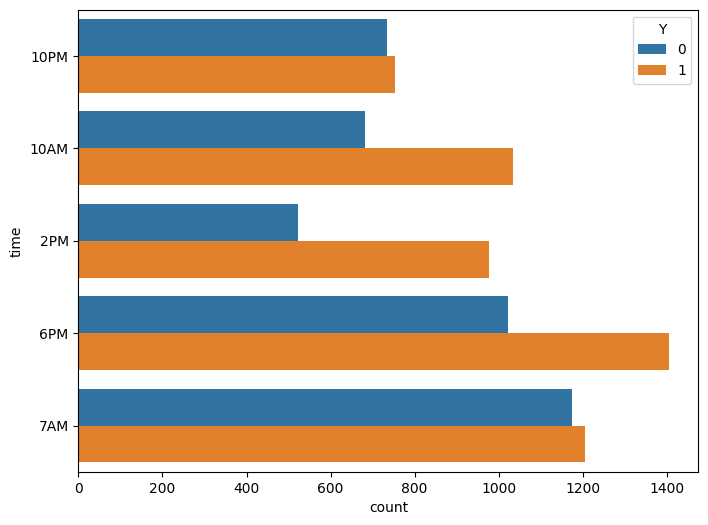

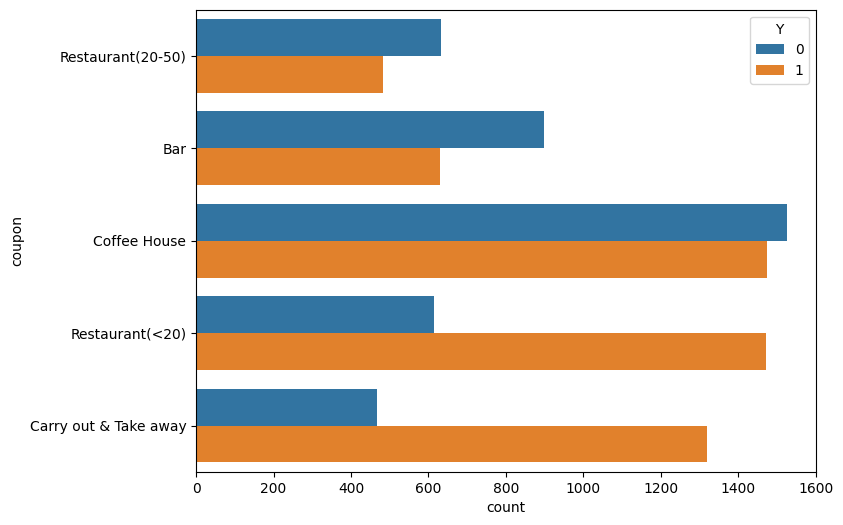

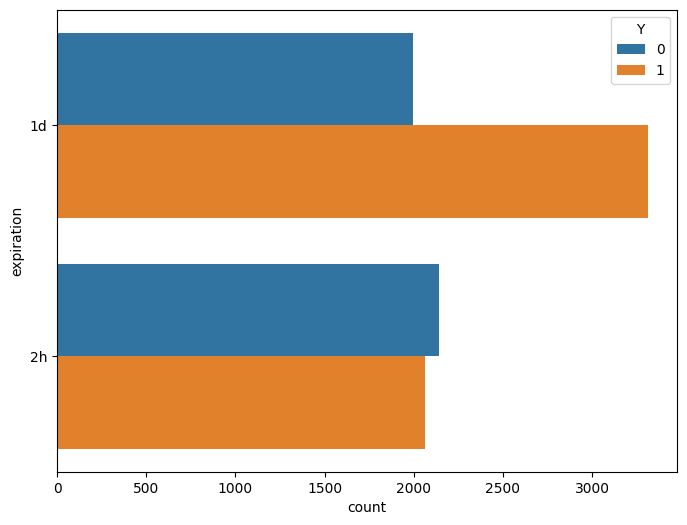

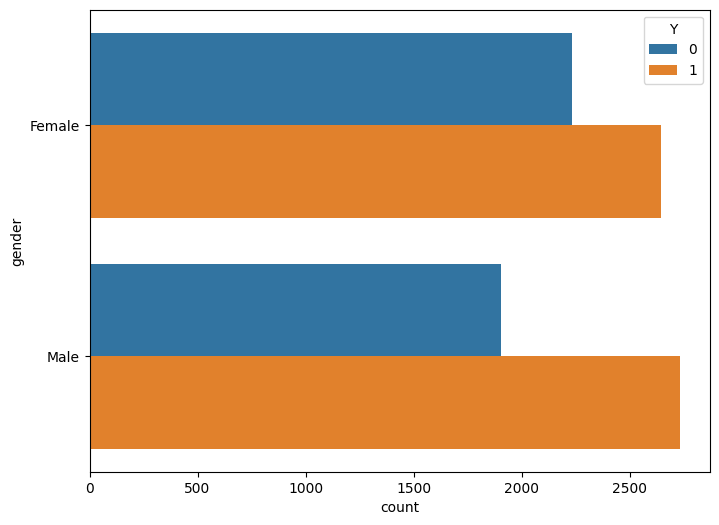

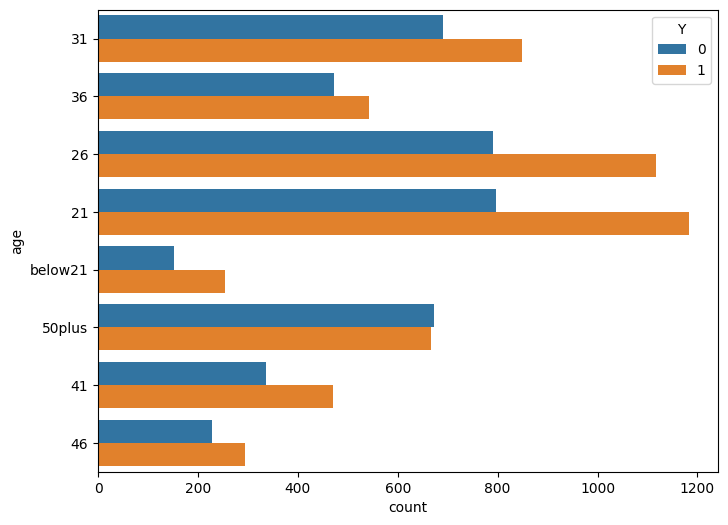

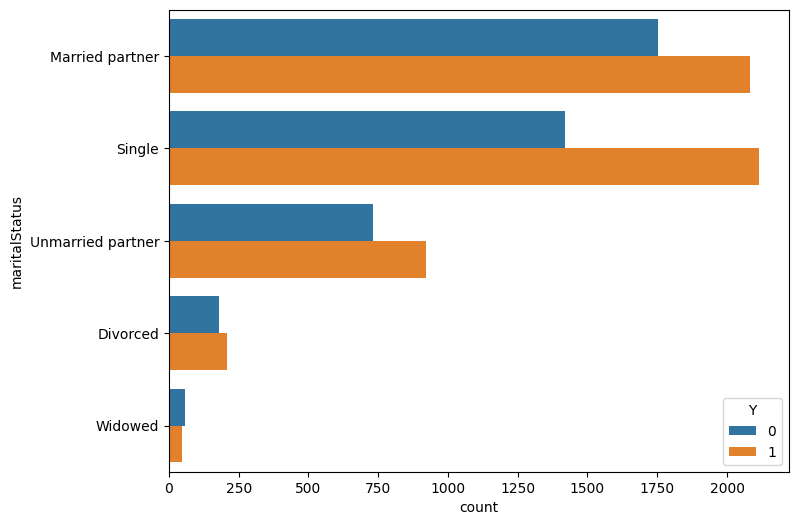

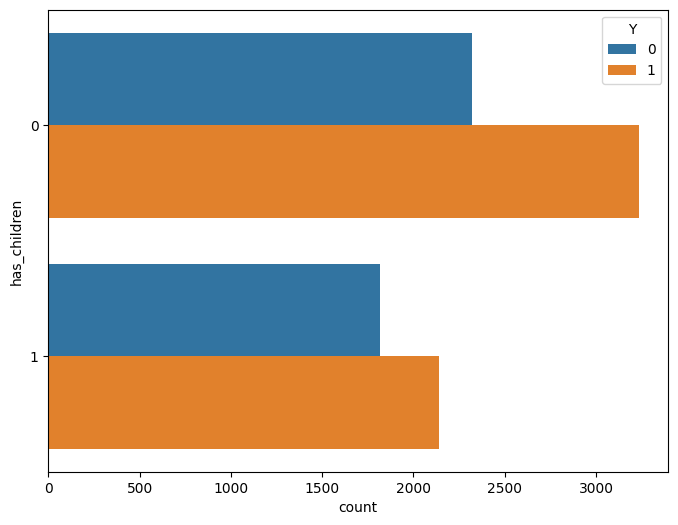

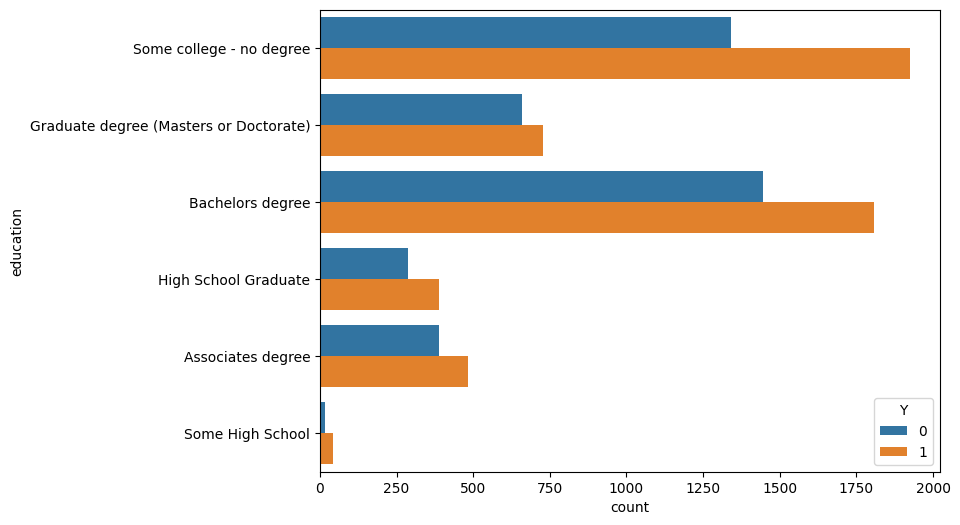

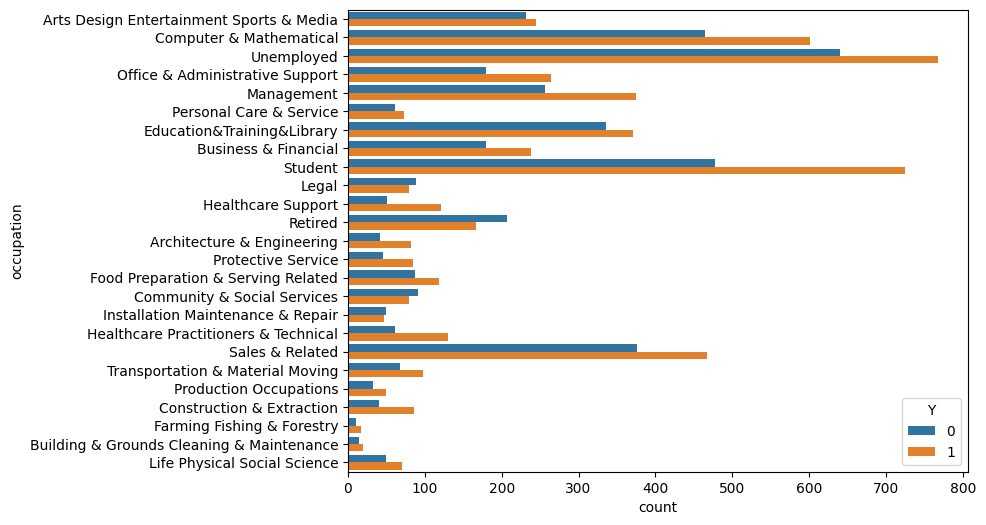

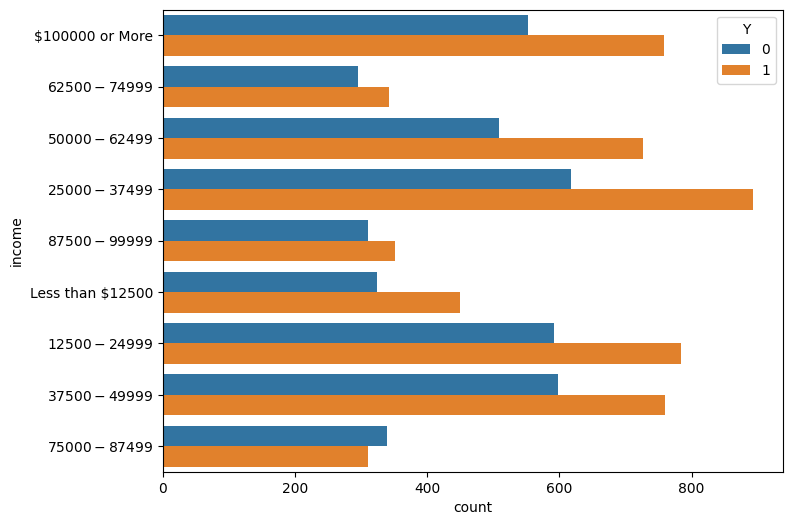

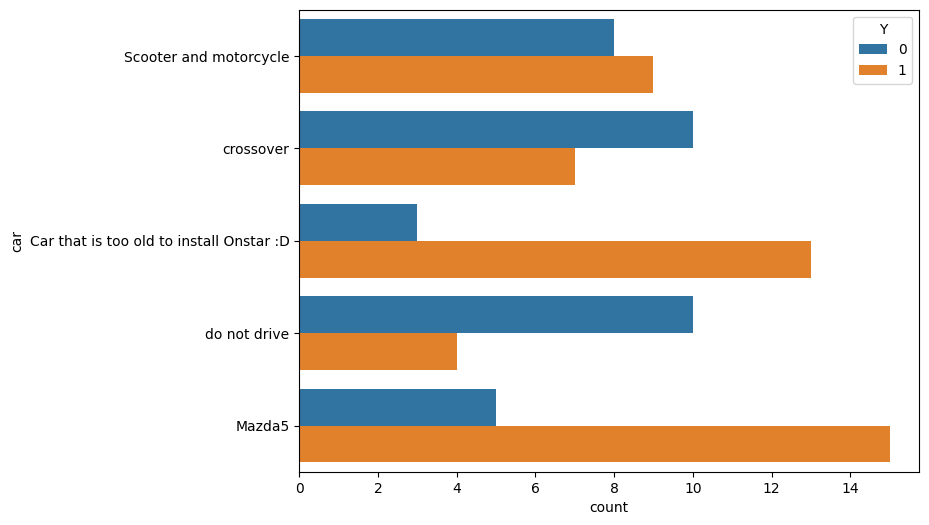

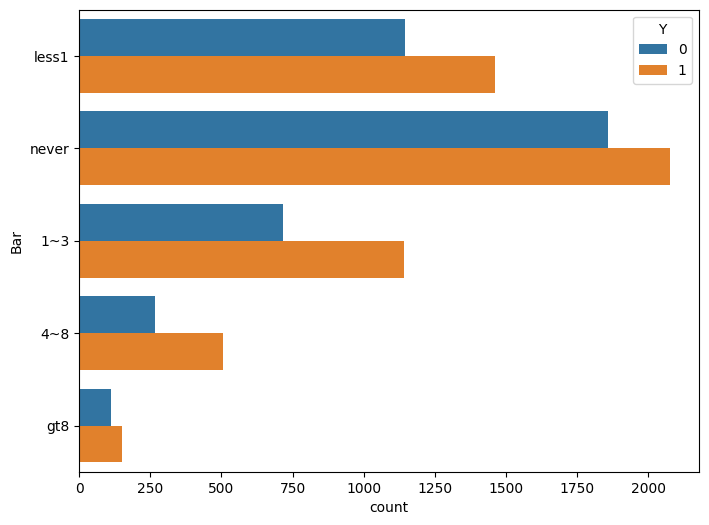

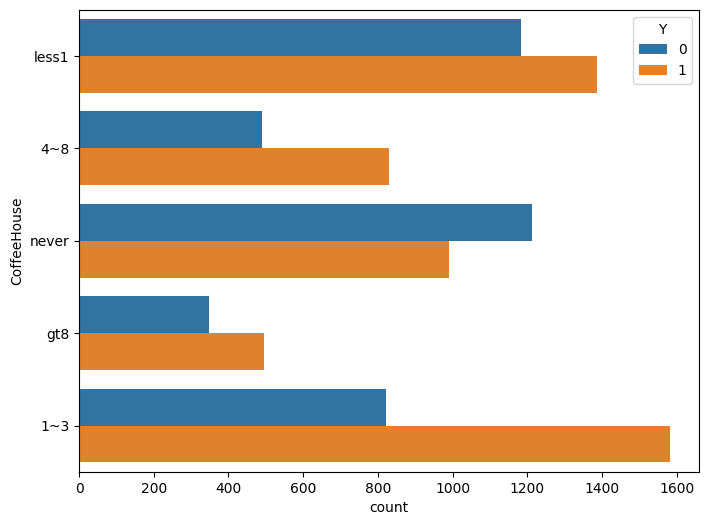

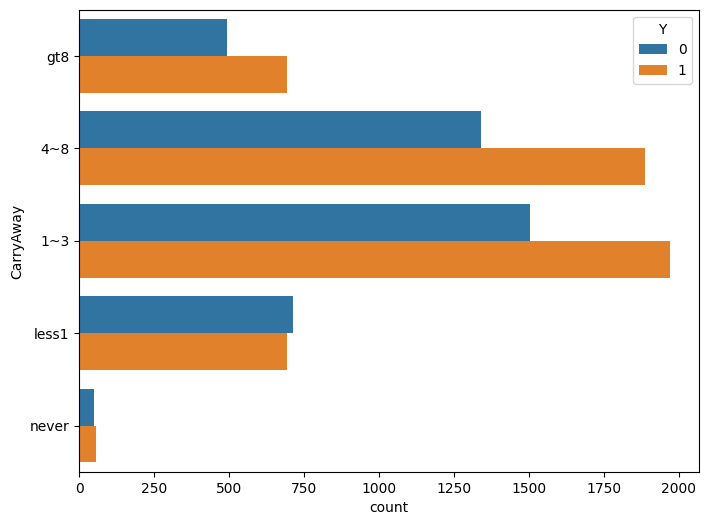

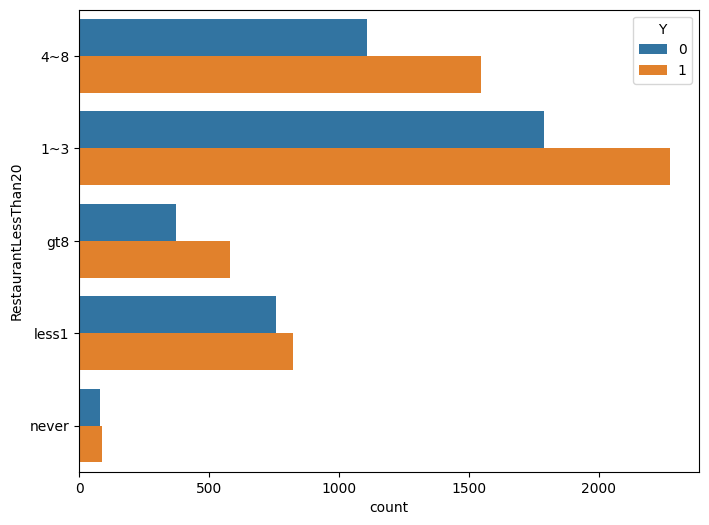

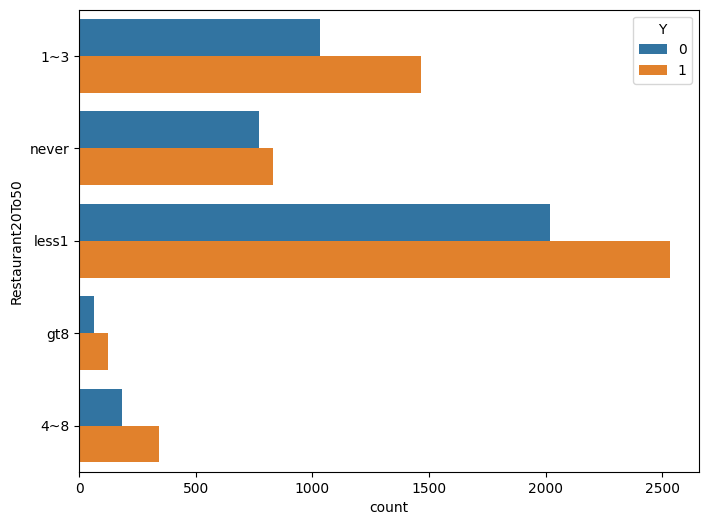

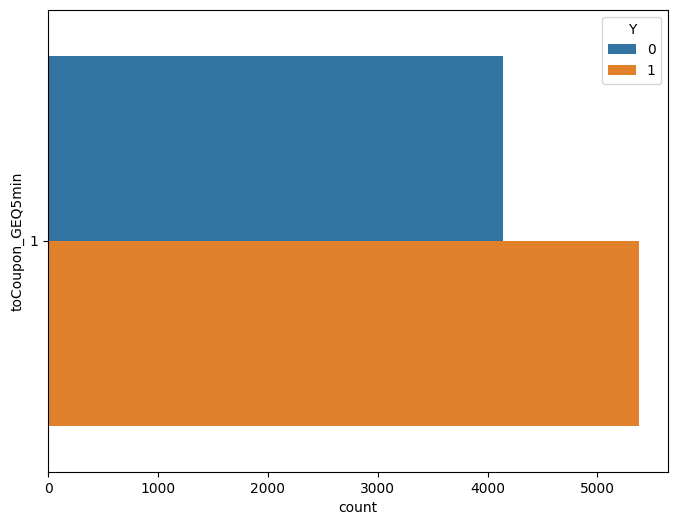

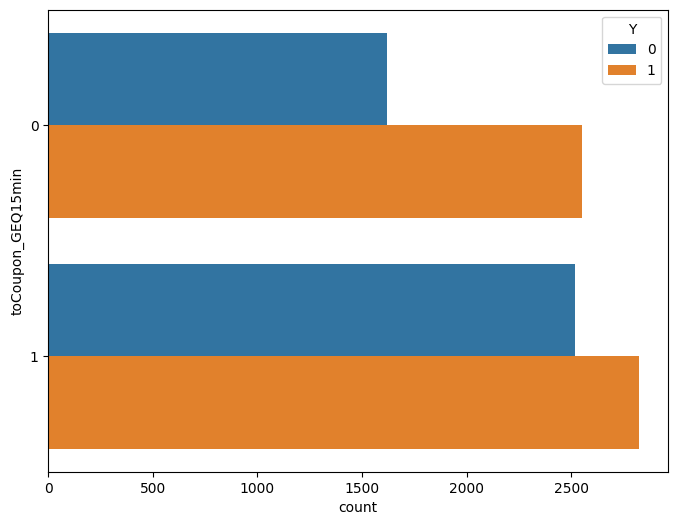

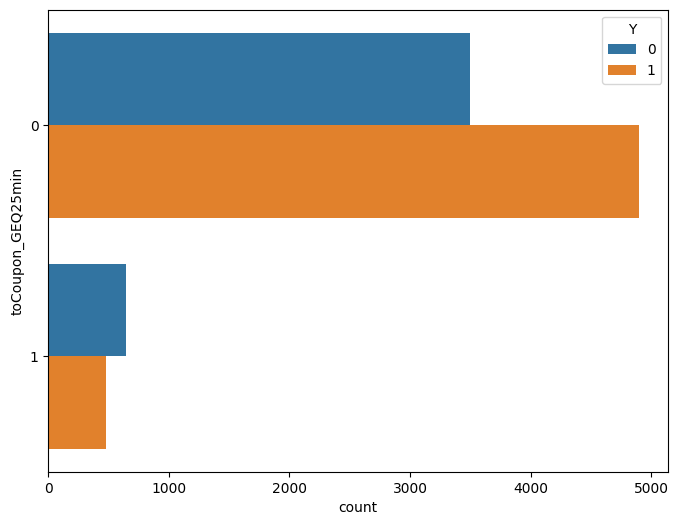

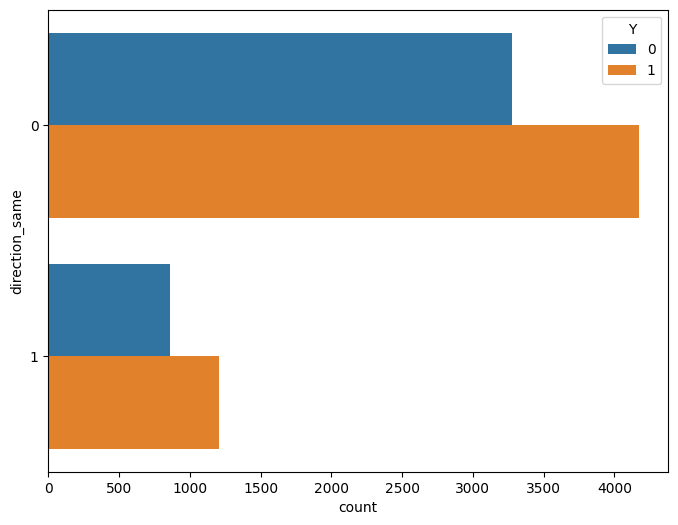

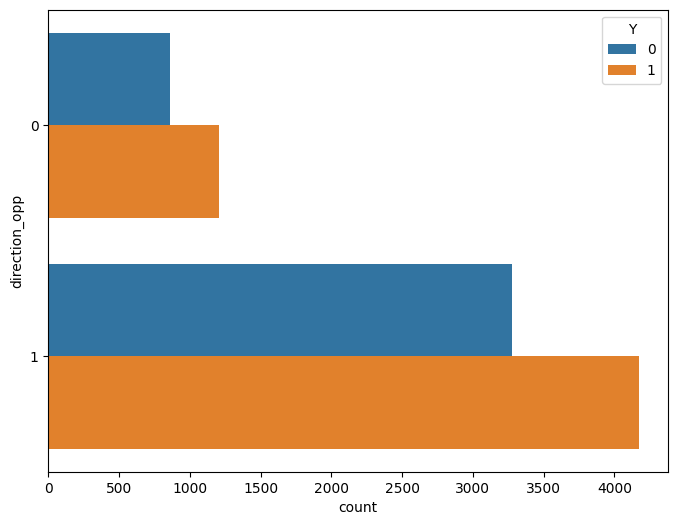

In [ ]:
for i in df.drop("Y",axis = 1).columns:
  plt.figure(figsize = (8,6))
  sns.countplot(data = x_train, y = i, hue = 'Y')
  plt.show()

Pudemos ver que as distribuições dentro de cada uma dos possíveis valores dentro das classes das features numéricas varia bastante. Algumas são representativas, outras parecem não ser....

Vamos agora verificar valores nulos no dataset.

In [ ]:
# Vamos verificar valores nulos
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9513 entries, 6758 to 8799
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           9513 non-null   object
 1   passanger             9513 non-null   object
 2   weather               9513 non-null   object
 3   temperature           9513 non-null   int64 
 4   time                  9513 non-null   object
 5   coupon                9513 non-null   object
 6   expiration            9513 non-null   object
 7   gender                9513 non-null   object
 8   age                   9513 non-null   object
 9   maritalStatus         9513 non-null   object
 10  has_children          9513 non-null   int64 
 11  education             9513 non-null   object
 12  occupation            9513 non-null   object
 13  income                9513 non-null   object
 14  car                   84 non-null     object
 15  Bar                   9429 non-null   ob

Algumas colunas tem muitos valores nulos, outras poucas e o restante não parece ter valores nulos.

Vamos mudar a forma de visualizar.

In [ ]:
x_train.isna().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
coupon                     0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     9429
Bar                       84
CoffeeHouse              174
CarryAway                112
RestaurantLessThan20      93
Restaurant20To50         150
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
Y                          0
dtype: int64

A Coluna 'car' mal tem valores preenchidos, fazer qualquer tipo de substituição aqui é muito difícil sem conhecer o contexto completo. Logo, vamos retira-la

In [ ]:
x_train = x_train.drop('car', axis = 1)

Vamos olhar agora os valores preenchidos e sua distribuição para o restante de colunas que apresentam valores nulos.


Para cada valor vamos verificar os valores mais comuns, para ver se há uma proporção que podemos usar.

In [ ]:
f = x_train[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']]


for i in f.columns:
  display(x_train[i].value_counts(normalize = True))
  print('\n')

Bar
never    0.416905
less1    0.276275
1~3      0.196733
4~8      0.082193
gt8      0.027893
Name: proportion, dtype: float64

CoffeeHouse
less1    0.275404
1~3      0.257201
never    0.235892
4~8      0.141236
gt8      0.090267
Name: proportion, dtype: float64

CarryAway
1~3      0.369535
4~8      0.343474
less1    0.149452
gt8      0.126157
never    0.011382
Name: proportion, dtype: float64

RestaurantLessThan20
1~3      0.431104
4~8      0.281741
less1    0.167834
gt8      0.101380
never    0.017941
Name: proportion, dtype: float64

Restaurant20To50
less1    0.485849
1~3      0.266474
never    0.171313
4~8      0.056392
gt8      0.019972
Name: proportion, dtype: float64

Vamos verificar quantas linhas são impactadas pela retirada dos casos vazios.

In [ ]:
df_not_na = x_train.dropna()
print(x_train.shape[0], df_not_na.shape[0], f'Percentual do dataframe retido {round(df_not_na.shape[0]/x_train.shape[0],4)*100} %')

9513 9051 Percentual do dataframe retido 95.14 %


Mesmo retirando todas as outras linhas com valores nulos ficamos com cerca de 95% do DataFrame. Dessa vez, vamos seguir por esse caminho, pois apesar de se tratarem de variáveis categóricas e poder imaginar substituir pelo valor mais comum, isso pode ser errado visto que a proporção de distribuição de valores caterogicos dentro das uma colunas é bem parecida.

In [ ]:
x_train = df_not_na

Vamos dar uma olhada no comportamento das variáveis numéricas.

In [ ]:
x_train.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,9051.000000,9051.000000,9051.0,9051.000000,9051.000000,9051.000000,9051.000000,9051.000000
mean,63.383052,0.410894,1.0,0.560712,0.118661,0.217435,0.782565,0.565904
std,19.112378,0.492023,0.0,0.496328,0.323407,0.412523,0.412523,0.495665
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Filtrando as variáveis númericas

colunas_numericas = x_train.select_dtypes(include= np.number).columns.drop('Y')
colunas_numericas

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'],
      dtype='object')

In [ ]:
# Filtrando as variáveis categóricas

colunas_categoricas = set(x_train.columns) - set(colunas_numericas)

Vamos agora explorar o mutual information

In [ ]:
enc = OrdinalEncoder()
enc.fit(x_train[list(colunas_categoricas)])
df_enc = enc.transform(x_train[list(colunas_categoricas)])

In [ ]:
x_train[list(colunas_categoricas)] = df_enc

In [ ]:
mt_info = mutual_info_classif(x_train.drop('Y', axis = 1), x_train['Y'], discrete_features=True)

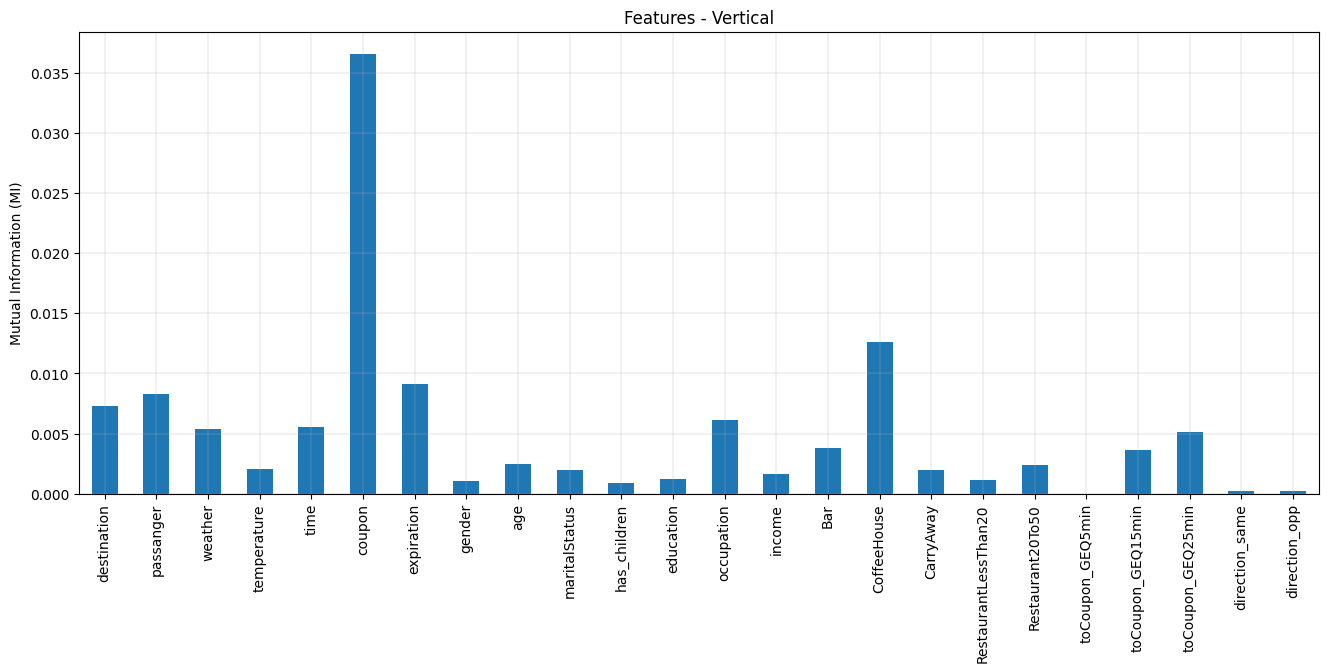

In [ ]:
mt_info_df = pd.Series(mt_info)
mt_info_df.index = x_train.drop('Y', axis = 1).columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

Vamos dropar todas as colunas que tem mutual information menor que 0.005. Isso vai ajudar na hora do One-hot-encoding, para não criar um dataset muito esparso e sem informações relevantes.

Algumas features possuem vários valores e poderiam deixar o dataset realmente muito grande

Isso foi uma questão de escolha, poderiamos testar com todas as colunas posteriomente para validar se iriamos ter algum ganho de desempenho.

In [ ]:
col_to_drop = mt_info_df[mt_info_df < 0.005].index.to_list()

#Adicionando aquela variavel vista acima, a de car
col_to_drop.append('car')

#### Discussion of key points

- There were missing values in the dataset? How did you dealt with each one?
- Changing the missing values impacted in the mutual information of features with the target?

Sim, tinhamos valores nulos no dataset. 6 Colunas apresentavam valores vazios.

Dessas 6, uma foi removida, pois estava quase que completamente vazia. Qualquer inferência de preenchimento aqui seria muito difícil.

Das outras 5 restantes a quantidade de valores nulos era muito pequena. Logo, fez-se o estudo da quantidade de dados que seriam perdidos dropando essas colunas e conclui-se que ainda ficariamos com 95% do dataset.

Para simplificar ainda mais optou-se para a retida dessas linhas. Logo, não tivemos o preenchimento de vazios e não pude calcular o impacto no mutual information das comparações.

Por fim, como na parte 1 do exercicio, algumas variáveis tem mais importância que outras na relação com a variável y, usamos o mutual information para filtrar alguma dessas informações.

### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

Vou fazer alguns features engineering aqui. Creio que isso deixara os dados em uma melhor forma.

In [ ]:
# link with google drive, remove comments if need to restart from this step.
import pandas as pd
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "in-vehicle-coupon-recommendation.csv" # Change this to be the correct path if you added the dataset in a different location

df = pd.read_csv(path)

Repetindo os passos comentados acima.

In [ ]:
df = df.drop(col_to_drop, axis = 1).dropna()

In [ ]:
df.head()

,destination,passanger,weather,time,coupon,expiration,occupation,CoffeeHouse,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,2PM,Restaurant(<20),1d,Unemployed,never,0,1
1,No Urgent Place,Friend(s),Sunny,10AM,Coffee House,2h,Unemployed,never,0,0
2,No Urgent Place,Friend(s),Sunny,10AM,Carry out & Take away,2h,Unemployed,never,0,1
3,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,2h,Unemployed,never,0,0
4,No Urgent Place,Friend(s),Sunny,2PM,Coffee House,1d,Unemployed,never,0,0


Vou transformar a coluna time no fluxo de 24 horas do dia, também vou mudar o formato do expiration date

In [ ]:
horas_do_dia = {'6PM': 18, '7AM': 7, '10AM': 10, '2PM': 14, '10PM': 22}

df['time'] = df['time'].map(horas_do_dia)


tempo = {'1d': 24, '2h': 2}

df['expiration'] = df['expiration'].map(tempo)

In [ ]:
df.head()

,destination,passanger,weather,time,coupon,expiration,occupation,CoffeeHouse,toCoupon_GEQ25min,Y
0,No Urgent Place,Alone,Sunny,14,Restaurant(<20),24,Unemployed,never,0,1
1,No Urgent Place,Friend(s),Sunny,10,Coffee House,2,Unemployed,never,0,0
2,No Urgent Place,Friend(s),Sunny,10,Carry out & Take away,2,Unemployed,never,0,1
3,No Urgent Place,Friend(s),Sunny,14,Coffee House,2,Unemployed,never,0,0
4,No Urgent Place,Friend(s),Sunny,14,Coffee House,24,Unemployed,never,0,0


Vou fazer o split das colunas.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Y', axis = 1), df['Y'], random_state = 77)

Fazendo o Scaler das variáveis númericas

In [ ]:
colunas_numericas = x_train.select_dtypes(include= np.number).columns
colunas_numericas

Index(['time', 'expiration', 'toCoupon_GEQ25min'], dtype='object')

In [ ]:
scaler_cla = StandardScaler()
scaler_cla.fit(x_train[colunas_numericas])

StandardScaler()

In [ ]:
x_train[colunas_numericas]  = scaler_cla.transform(x_train[colunas_numericas])
x_test[colunas_numericas]  = scaler_cla.transform(x_test[colunas_numericas])

In [ ]:
x_train.head()

,destination,passanger,weather,time,coupon,expiration,occupation,CoffeeHouse,toCoupon_GEQ25min
10477,Home,Alone,Rainy,0.771793,Bar,0.886021,Student,less1,2.719040
1530,No Urgent Place,Kid(s),Sunny,-0.707859,Restaurant(<20),-1.128642,Construction & Extraction,1~3,-0.367777
4251,Home,Alone,Sunny,1.511619,Restaurant(<20),-1.128642,Student,4~8,-0.367777
11025,Home,Alone,Rainy,1.511619,Coffee House,-1.128642,Unemployed,never,-0.367777
900,Work,Alone,Sunny,-1.262729,Restaurant(<20),0.886021,Office & Administrative Support,less1,-0.367777


Fazendo one hot encoding de variáveis categoricas

In [ ]:
colunas_categoricas = list(set(df.drop('Y', axis =1).columns) - set(colunas_numericas))

In [ ]:
x_train[colunas_categoricas].head()

,occupation,passanger,weather,coupon,CoffeeHouse,destination
10477,Student,Alone,Rainy,Bar,less1,Home
1530,Construction & Extraction,Kid(s),Sunny,Restaurant(<20),1~3,No Urgent Place
4251,Student,Alone,Sunny,Restaurant(<20),4~8,Home
11025,Unemployed,Alone,Rainy,Coffee House,never,Home
900,Office & Administrative Support,Alone,Sunny,Restaurant(<20),less1,Work


In [ ]:
ONE_clas = OneHotEncoder(sparse_output = False, feature_name_combiner = 'concat')
ONE_clas.fit(x_train[colunas_categoricas])

OneHotEncoder(sparse_output=False)

In [ ]:
x_train

,destination,passanger,weather,time,coupon,expiration,occupation,CoffeeHouse,toCoupon_GEQ25min
10477,Home,Alone,Rainy,0.771793,Bar,0.886021,Student,less1,2.719040
1530,No Urgent Place,Kid(s),Sunny,-0.707859,Restaurant(<20),-1.128642,Construction & Extraction,1~3,-0.367777
4251,Home,Alone,Sunny,1.511619,Restaurant(<20),-1.128642,Student,4~8,-0.367777
11025,Home,Alone,Rainy,1.511619,Coffee House,-1.128642,Unemployed,never,-0.367777
900,Work,Alone,Sunny,-1.262729,Restaurant(<20),0.886021,Office & Administrative Support,less1,-0.367777
...,...,...,...,...,...,...,...,...,...
9682,Work,Alone,Sunny,-1.262729,Restaurant(<20),0.886021,Student,never,-0.367777
2344,No Urgent Place,Kid(s),Sunny,-0.707859,Carry out & Take away,-1.128642,Education&Training&Library,1~3,-0.367777
10369,Home,Alone,Sunny,0.771793,Restaurant(<20),0.886021,Computer & Mathematical,less1,-0.367777
12055,Home,Alone,Sunny,0.771793,Carry out & Take away,-1.128642,Community & Social Services,never,-0.367777


In [ ]:
# X_train
x_train_dummy = ONE_clas.transform(x_train[colunas_categoricas])
x_train_dummy = pd.DataFrame(x_train_dummy, index = x_train.index, columns = list(ONE_clas.get_feature_names_out()))
x_train = pd.concat([x_train.drop(colunas_categoricas, axis = 1), x_train_dummy], axis = 1)


In [ ]:
# X_test
x_test_dummy = ONE_clas.transform(x_test[colunas_categoricas])
x_test_dummy = pd.DataFrame(x_test_dummy, index = x_test.index,  columns = list(ONE_clas.get_feature_names_out()))

x_test = pd.concat([x_test.drop(colunas_categoricas, axis = 1), x_test_dummy], axis = 1)

In [ ]:
x_train.head()

,time,expiration,toCoupon_GEQ25min,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,destination_Home,destination_No Urgent Place,destination_Work
10477,0.771793,0.886021,2.719040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1530,-0.707859,-1.128642,-0.367777,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4251,1.511619,-1.128642,-0.367777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11025,1.511619,-1.128642,-0.367777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
900,-1.262729,0.886021,-0.367777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
KNN = KNeighborsClassifier()
x_train.columns = x_train.columns.astype(str)
KNN.fit(x_train,y_train)

y_pred = KNN.predict(x_test)

In [ ]:
#Métricas aqui

# Acuracia Balanceada
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')


# Acuracia Normal
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
print('#------------------------------------------------------------#')


# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
print('#------------------------------------------------------------#')


# F1 - Score
f1_score_ = f1_score(y_test, y_pred)
print("f1-score:", f1_score_)
print('#------------------------------------------------------------#')


#Resumo geral
print(classification_report(y_test, y_pred))
print('#------------------------------------------------------------#')


#------------------------------------------------------------#
Balanced Accuracy: 0.6568543026347595
#------------------------------------------------------------#
Accuracy: 0.6714789862046839
#------------------------------------------------------------#
Recall: 0.7631133671742809
#------------------------------------------------------------#
Precision: 0.6913643331630046
#------------------------------------------------------------#
f1-score: 0.7254691689008043
#------------------------------------------------------------#
              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1344
           1       0.69      0.76      0.73      1773

    accuracy                           0.67      3117
   macro avg       0.66      0.66      0.66      3117
weighted avg       0.67      0.67      0.67      3117

#------------------------------------------------------------#


In [ ]:
def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Real')
    plt.show()

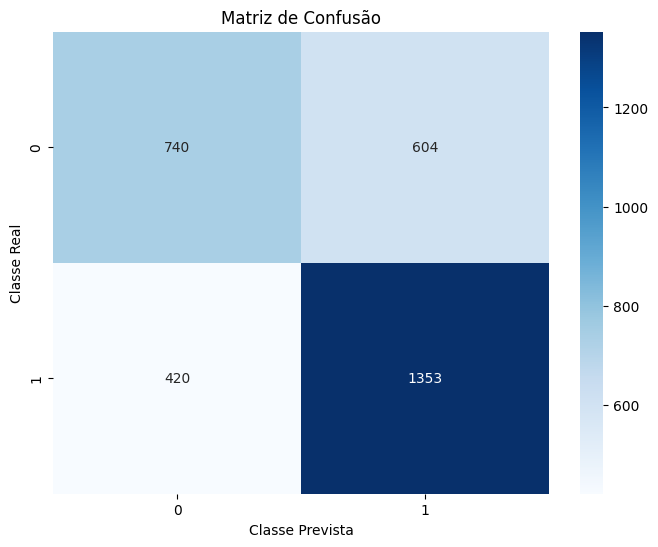

In [ ]:
conf = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf)

In [ ]:
# Vamos medir o valor de k no F1-score de interesse.
k = []
f1_score_list = []
acuracia_ = []
recall_ = []
precision_ = []

for i in range(200):
  KNN = KNeighborsClassifier(n_neighbors = i+1)
  x_train.columns = x_train.columns.astype(str)
  KNN.fit(x_train,y_train)
  y_pred = KNN.predict(x_test)
  # accuracy = accuracy_score(y_test, y_pred)
  # precision = precision_score(y_test, y_pred)
  # recall = recall_score(y_test, y_pred)
  f1_score_ = f1_score(y_test, y_pred)
  k.append(i+1)
  f1_score_list.append(f1_score_)
  # acuracia_.append(accuracy)
  # precision_.append(precision)
  # recall_.append(recall)

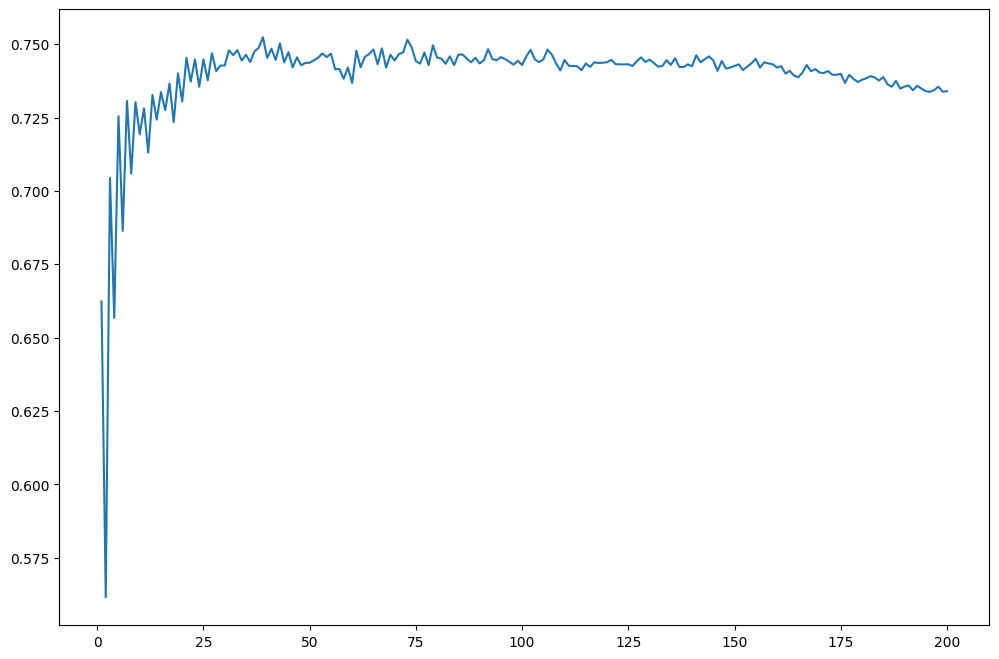

In [ ]:
plt.figure(figsize = (12,8))
# sns.lineplot(x = k, y = acuracia_)
# sns.lineplot(x = k, y = recall_)
sns.lineplot(x = k, y = f1_score_list)
# sns.lineplot(x = k, y = precision_)
plt.show()

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

Respondendo as perguntas.

Talvez a acurácia não seja a melhor métrica aqui. Isso por que o fator de interesse aqui são as classes POSITIVAS que previmos de maneira correta, ela nos interessa como fator de negócio! Como a acurácia mede o número de acertos, ela acaba não sendo a melhor nesse caso.

Queremos acertas quais as indicações e fatores que inflenciam de fator positivo o uso do cupom. Dito isso, a precisão e recall são métricas mais interessantes!

O modelo parece ter acertado de maneira satisfatória os casos positivos (e também os casos negativos). O F1-score para a classe positiva de 73%, junto com os valores de recall e precisão mostram que houve uma boa classificação com base dos casos de interesse. A matriz de confusão reforça os números indicados, nota-se o detaque em azul mais escuro para as classes positivas classificadas de maneira correta.

O melhor k aparenta acontecer após 25 vizinhos. Após isso o f1-score se mantem mais ou menos contante. A decisão do exato melhor K vai depender se queremos priorizar o recall ou precisão.

Quanto ao efeito no viés e variância. Para k baixos o principal potencial impacto pode vir de variancia, devido a tendência de criar uma fronteira de decisão menos rigda no modelo. Já para K muito grandes o principal fator de erro pode ser de vies, justamente pela menor flexibilidade e a criação de uma fronteira de decisão mais rigida. Isso fica melhor exposto na imagem abaixo, retirada do livro bibliografia do curso


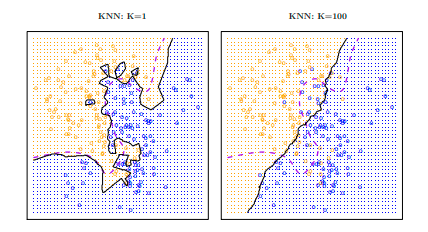

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Seoul Bike Sharing Demand**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of the original dataset(`Rented Bike count`).<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum value of the known `Rented Bike count` in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

In [ ]:
# link with google drive
from google.colab import drive
import pandas as pd
pd.set_option('display.max_columns', None)
drive.mount('/content/gdrive', force_remount=True)

# load dataset from google drive
path = "gdrive/MyDrive/MC886 - Datasets/" + "SeoulBikeData.csv" # Change this to be the correct path if you added the dataset in a different location
df = pd.read_csv(path)

Mounted at /content/gdrive


In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,256,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
1,01/12/2017,206,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
2,01/12/2017,175,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,1
3,01/12/2017,109,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,1
4,01/12/2017,80,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,1


In [ ]:
df['Class'] = np.where(df['Rented Bike Count'] > df['Rented Bike Count'].median(), 1, 0 )

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['Class'], random_state = 77)

In [ ]:
x_train = x_train.drop(['Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)', 'Date', 'Rented Bike Count', 'Class'], axis = 1)
x_test = x_test.drop(['Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Wind speed (m/s)', 'Date', 'Rented Bike Count', 'Class'], axis = 1)
x_test.head()

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Seasons,Functioning Day
4952,8,23.8,66,960,17.0,0.74,Summer,1
3779,11,20.2,45,1894,7.8,2.33,Spring,1
577,1,-1.2,57,1429,-8.6,0.00,Winter,1
5527,7,23.6,75,856,18.9,0.36,Summer,1
1844,20,-0.4,27,2000,-17.1,0.00,Winter,1


In [ ]:
cols_transform = x_train.columns.drop(['Seasons', 'Functioning Day'])

scaler = StandardScaler()
scaler.fit(x_train[cols_transform])

x_train[cols_transform]  = scaler.transform(x_train[cols_transform])
x_test[cols_transform]  = scaler.transform(x_test[cols_transform])

In [ ]:
ONE = OneHotEncoder(sparse_output = False)
ONE.fit(x_train[['Seasons']])

# X_train
x_train_dummy = ONE.transform(x_train[['Seasons']])
x_train_dummy = pd.DataFrame(x_train_dummy, columns = list(ONE.categories_), index = x_train.index)
x_train_dummy.columns = [col[0] for col in x_train_dummy.columns]
x_train = pd.concat([x_train.drop('Seasons', axis = 1), x_train_dummy], axis = 1)


# X_test
x_test_dummy = ONE.transform(x_test['Seasons'].to_numpy().reshape(-1, 1))
x_test_dummy = pd.DataFrame(x_test_dummy, columns = ONE.categories_, index = x_test.index)
x_test_dummy.columns = [col[0] for col in x_test_dummy.columns]

x_test = pd.concat([x_test.drop('Seasons', axis = 1), x_test_dummy], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
x_train.head()

,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Functioning Day,Autumn,Spring,Summer,Winter
6556,-1.092995,0.849934,1.219982,-0.559884,1.221535,-0.649458,1,0.0,0.0,1.0,0.0
7495,-0.662110,-0.182430,0.580397,0.919237,0.103531,-0.649458,0,1.0,0.0,0.0,0.0
4718,0.343286,1.118516,-0.747973,0.826998,0.658678,3.027495,1,0.0,0.0,1.0,0.0
1447,-0.662110,-2.045721,-0.059188,0.892883,-1.723826,-0.649458,1,0.0,0.0,0.0,1.0
2813,-0.949367,-0.241183,1.072386,-1.772170,0.196056,-0.649458,1,0.0,1.0,0.0,0.0


In [ ]:
KNN = KNeighborsClassifier()
x_train.columns = x_train.columns.astype(str)
KNN.fit(x_train,y_train)

y_pred = KNN.predict(x_test)

In [ ]:
#Metricas aqui

# Acuracia Balanceada
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print('#------------------------------------------------------------#')
print("Balanced Accuracy:", b_accuracy)
print('#------------------------------------------------------------#')


# Acuracia Normal
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('#------------------------------------------------------------#')

# Recall Score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
print('#------------------------------------------------------------#')


# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)
print('#------------------------------------------------------------#')


# F1 - Score
f1_score_ = f1_score(y_test, y_pred)
print("f1-score:", f1_score_)
print('#------------------------------------------------------------#')


#Resumo geral
print(classification_report(y_test, y_pred))
print('#------------------------------------------------------------#')


#------------------------------------------------------------#
Balanced Accuracy: 0.9096802471197194
#------------------------------------------------------------#
Accuracy: 0.9105022831050228
#------------------------------------------------------------#
Recall: 0.8839622641509434
#------------------------------------------------------------#
Precision: 0.9277227722772278
#------------------------------------------------------------#
f1-score: 0.9053140096618357
#------------------------------------------------------------#
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1130
           1       0.93      0.88      0.91      1060

    accuracy                           0.91      2190
   macro avg       0.91      0.91      0.91      2190
weighted avg       0.91      0.91      0.91      2190

#------------------------------------------------------------#


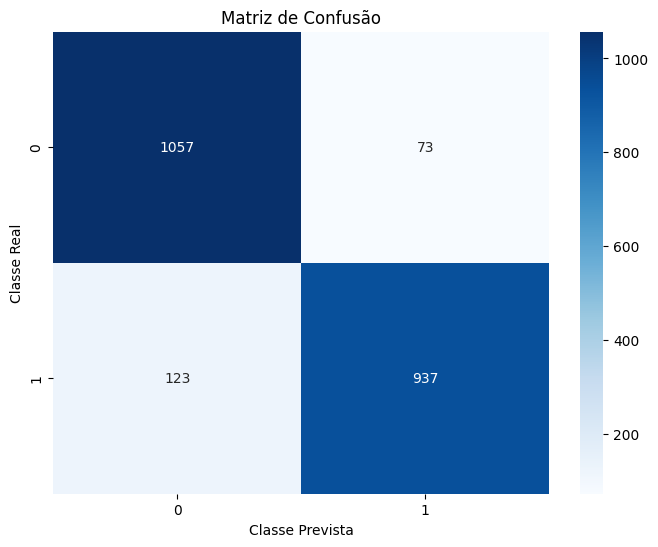

In [ ]:
conf = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf)

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- There is value in solve a regression problem as a multiclass classification problem?

Para esse caso a acurácia pode sim ser uma boa métrica! Pois a área de negócio pode qurer desejar predizer se em uma data e horário específico o consumo esperado (baseado nas features estudadas), será maior ou menor que esperado.

A conclusão tirada da matriz de confusão é que o modelo muito bem as classes em que cada instância estaria. Isso provavelmente se deve ao fato de que é muito mais fácil predizer se um valor será acima ou abaixo da mediana do que predizer o valor fechado de um ponto.

Sim, temos muito valor em usar problemas de regressão como problemas de regressão. Embora isso possa depender muito do caso, as vezes se queremos apenas segmentar alguns clientes, pontos, volume e etc em intervalos bem definidos, pode ser muito interessante mudar a visão de uma regressão para classificação.